# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
!pip3 install termcolor

In [2]:
#!pip install pyforest
# 1-Import Libraies

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
%matplotlib notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

# User Defined Functions

In [3]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################


# Implement basic steps to see how is your data looks like | EDA 

In [4]:
# 2-Load|Read Data
dataset_path = "World military power.xlsx"
df0 = pd.read_excel(dataset_path, header=1)
# df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(138, 60)
There is 138 observation and 60 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Streng

0 %, percentage of missing values of attack_aircraft_strength less than limit 90 %, so we will keep it.
0 %, percentage of missing values of attack_aircraft_strength_value less than limit 90 %, so we will keep it.
0 %, percentage of missing values of transport_aircraft_fleet_strength less than limit 90 %, so we will keep it.
0 %, percentage of missing values of transport_aircraft_fleet_strength_value less than limit 90 %, so we will keep it.
0 %, percentage of missing values of trainer_aircraft_fleet less than limit 90 %, so we will keep it.
0 %, percentage of missing values of trainer_aircraft_fleet_value less than limit 90 %, so we will keep it.
0 %, percentage of missing values of helicopter_fleet_strength less than limit 90 %, so we will keep it.
0 %, percentage of missing values of helicopter_fleet_strength_value less than limit 90 %, so we will keep it.
0 %, percentage of missing values of attack_helicopter_fleet_strength less than limit 90 %, so we will keep it.
0 %, percentage 

In [5]:
df.head()

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   
3            Angola                          0.838            Angola   
4         Argentina                          0.652         Argentina   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   
3                      295                       Angola   
4                      227                    Argentina   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   
3                                  72                   Angola   
4                                  24                Argentina   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   
3                            47                    Angola   
4                            64                 Argentina   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   
3                              126                           Angola   
4                              100                        Argentina   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   
3                                      15        Angola                  379   
4                                       0     Argentina                  370   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   
3           Angola                     595                            Angola   
4        Argentina                     739                         Argentina   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2     

In [6]:
df.tail()

military_strength  military_strength_power_index aircraft_strength  \
133         Venezuela                          0.645         Venezuela   
134           Vietnam                          0.356           Vietnam   
135             Yemen                          1.241             Yemen   
136            Zambia                          1.646            Zambia   
137          Zimbabwe                          1.758          Zimbabwe   

     aircraft_strength_value fighter/interceptor_strength  \
133                      260                    Venezuela   
134                      293                      Vietnam   
135                      169                        Yemen   
136                      108                       Zambia   
137                       90                     Zimbabwe   

     fighter/interceptor_strength_value attack_aircraft_strength  \
133                                  38                Venezuela   
134                                  77                  Vietnam   
135                                  77                    Yemen   
136                                  18                   Zambia   
137                                  10                 Zimbabwe   

     attack_aircraft_strength_value transport_aircraft_fleet_strength  \
133                               0                         Venezuela   
134                               0                           Vietnam   
135                               0                             Yemen   
136                               0                            Zambia   
137                               0                          Zimbabwe   

     transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
133                                       52              Venezuela   
134                                       38                Vietnam   
135                                        8                  Yemen   
136                                       11                 Zambia   
137                                       14               Zimbabwe   

     trainer_aircraft_fleet_value helicopter_fleet_strength  \
133                            82                 Venezuela   
134                            36                   Vietnam   
135                            21                     Yemen   
136                            52                    Zambia   
137                            38                  Zimbabwe   

     helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
133                               86                        Venezuela   
134                              138                          Vietnam   
135                               61                            Yemen   
136                               27                           Zambia   
137                               28                         Zimbabwe   

     attack_helicopter_fleet_strength_value tank_strength  \
133                                      10     Venezuela   
134                                      25       Vietnam   
135                                      14         Yemen   
136                                       0        Zambia   
137                                       6      Zimbabwe   

     tank_strength_value afv/apc_strength  afv/apc_strength_value  \
133                  390        Venezuela                     600   
134                 2615          Vietnam                    2530   
135                  620            Yemen                     615   
136                   75           Zambia                     184   
137                   42         Zimbabwe                     300   

    self-propelled_artillery_strength  \
133                         Venezuela   
134                           Vietnam   
135                             Yemen   
136                            Zambia   
137                          Zimbabwe   

     self-propelled_artillery_strength_value towed_artillery_strength 

In [7]:
df.sample(5)

military_strength  military_strength_power_index aircraft_strength  \
73            Mexico                          0.607            Mexico   
48           Hungary                          0.822           Hungary   
74           Moldova                          2.129           Moldova   
41             Gabon                          3.374             Gabon   
92            Panama                          3.654            Panama   

    aircraft_strength_value fighter/interceptor_strength  \
73                      484                       Mexico   
48                       47                      Hungary   
74                        3                      Moldova   
41                       23                        Gabon   
92                       39                       Panama   

    fighter/interceptor_strength_value attack_aircraft_strength  \
73                                   3                   Mexico   
48                                  12                  Hungary   
74                                   0                  Moldova   
41                                   6                    Gabon   
92                                   0                   Panama   

    attack_aircraft_strength_value transport_aircraft_fleet_strength  \
73                              33                            Mexico   
48                               0                           Hungary   
74                               0                           Moldova   
41                               0                             Gabon   
92                               0                            Panama   

    transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
73                                       43                 Mexico   
48                                        5                Hungary   
74                                        1                Moldova   
41                                        2                  Gabon   
92                                       11                 Panama   

    trainer_aircraft_fleet_value helicopter_fleet_strength  \
73                           206                    Mexico   
48                             6                   Hungary   
74                             0                   Moldova   
41                             0                     Gabon   
92                             4                    Panama   

    helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
73                              202                           Mexico   
48                               24                          Hungary   
74                                2                          Moldova   
41                               15                            Gabon   
92                               23                           Panama   

    attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
73                                       0        Mexico                    0   
48                                       8       Hungary                   30   
74                                       0       Moldova                    0   
41                                       0         Gabon                    0   
92                                       0        Panama                    0   

   afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
73           Mexico                    2199                            Mexico   
48          Hungary                     944                           Hungary   
74          Moldova                     341                           Moldova   
41            Gabon                      70                             Gabon   
92           Panama                      65                            Panama   

    self-propelled_artillery_strength_value towed_artillery_strength  \
73                                        0                   Mexico   
48                    

In [8]:
df.describe().T

count     mean      std    min  \
military_strength_power_index           138.000    1.461    1.324  0.061   
aircraft_strength_value                 138.000  388.471 1231.982  0.000   
fighter/interceptor_strength_value      138.000   81.565  230.325  0.000   
attack_aircraft_strength_value          138.000   25.761   94.528  0.000   
transport_aircraft_fleet_strength_value 138.000   30.232   92.330  0.000   
trainer_aircraft_fleet_value            138.000   82.833  240.804  0.000   
helicopter_fleet_strength_value         138.000  154.065  520.184  0.000   
attack_helicopter_fleet_strength_value  138.000   25.623   97.326  0.000   
tank_strength_value                     138.000  646.565 1515.464  0.000   
afv/apc_strength_value                  138.000 2485.696 5410.546  0.000   
self-propelled_artillery_strength_value 138.000  212.159  688.029  0.000   
towed_artillery_strength_value          138.000  393.978  805.782  0.000   
rocket_projector_strength_value         138.000  156.935  484.381  0.000   
navy_fleet_strengths_value              124.000   84.984  146.114  0.000   
aircraft_carrier_fleet_strength_value   115.000    0.383    1.972  0.000   
submarine_fleet_strength_value          115.000    4.800   13.707  0.000   
destroyer_fleet_strength_value          115.000    2.052   10.001  0.000   
frigate_fleet_strength_value            115.000    3.522    6.481  0.000   
airport_totals_value                    138.000  290.043 1212.967  2.000   
total_border_coverage_value             129.000 3964.225 3760.100 29.000   

                                             25%      50%      75%       max  
military_strength_power_index              0.575    1.034    2.022    10.168  
aircraft_strength_value                   33.000  111.000  290.250 13264.000  
fighter/interceptor_strength_value         0.000   17.000   60.500  2085.000  
attack_aircraft_strength_value             0.000    0.000   15.750   742.000  
transport_aircraft_fleet_strength_value    3.000    9.000   26.000   945.000  
trainer_aircraft_fleet_value               4.250   26.000   79.250  2643.000  
helicopter_fleet_strength_value           15.250   44.000  126.750  5768.000  
attack_helicopter_fleet_strength_value     0.000    2.000   17.750   967.000  
tank_strength_value                       19.250  153.000  436.250 12950.000  
afv/apc_strength_value                   250.250  734.500 2000.000 39253.000  
self-propelled_artillery_strength_value    0.000   23.000   97.250  6083.000  
towed_artillery_strength_value            24.250  108.000  296.500  4465.000  
rocket_projector_strength_value            0.000   24.000   99.750  3860.000  
navy_fleet_strengths_value                10.000   38.000   77.750   984.000  
aircraft_carrier_fleet_strength_value      0.000    0.000    0.000    20.000  
submarine_fleet_strength_value             0.000    0.000    4.000    83.000  
destroyer_fleet_strength_value             0.000    0.000    0.000    91.000  
frigate_fleet_strength_value               0.000    0.000    5.500    52.000  
airport_totals_value                      33.500   68.000  150.750 13513.000  
total_border_coverage_value             1587.000 2816.000 5267.000 22457.000

In [9]:
df.describe(include=object).T

count unique                top freq
military_strength                   138    138             Panama    1
aircraft_strength                   138    138             Panama    1
fighter/interceptor_strength        138    138             Panama    1
attack_aircraft_strength            138    138             Panama    1
transport_aircraft_fleet_strength   138    138             Panama    1
trainer_aircraft_fleet              138    138             Panama    1
helicopter_fleet_strength           138    138             Panama    1
attack_helicopter_fleet_strength    138    138             Panama    1
tank_strength                       138    138             Panama    1
afv/apc_strength                    138    138             Panama    1
self-propelled_artillery_strength   138    138             Panama    1
towed_artillery_strength            138    138             Panama    1
rocket_projector_strength           138    138             Panama    1
navy_fleet_strengths                124    124             Panama    1
aircraft_carrier_fleet_strength     115    115             Panama    1
submarine_fleet_strength            115    115             Panama    1
destroyer_fleet_strength            115    115             Panama    1
frigate_fleet_strength              115    115             Panama    1
defense_spending_budget             138    138             Panama    1
defense_spending_budget_value       138    124     2,50,00,00,000    3
external_debt                       138    138             Panama    1
external_debt_value                 138    138  4,84,80,00,00,000    1
airport_totals                      138    138             Panama    1
oil_production                      138    138             Panama    1
oil_production_value                138     88                  0   46
oil_consumption                     138    138             Panama    1
oil_consumption_value               138    102              18500    4
proven_oil_reserves                 138    138             Panama    1
proven_oil_reserves_value           138     84                  0   46
available_manpower                  138    138             Panama    1
available_manpower_value            138    138        1,11,60,747    1
total_population                    138    138             Panama    1
total_population_value              138    138          30,57,220    1
total_square_land_area              138    138             Panama    1
total_square_land_area_value        138    138           6,22,984    1
total_coastline_coverage            109    109             Panama    1
total_coastline_coverage_value      109    104                193    2
total_waterway_coverage             138    138             Panama    1
total_waterway_coverage_value       138     92                  0   38
total_border_coverage               129    129             Panama    1

In [10]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
aircraft_strength_value has 113 unique value
fighter/interceptor_strength_value has 63 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
trainer_aircraft_fleet_value has 77 unique value
helicopter_fleet_strength_value has 97 unique value
attack_helicopter_fleet_strength_value has 45 unique value
tank_strength_value has 106 unique value
afv/apc_strength_value has 130 unique value
self-propelled_artillery_strength_value has 70 unique value
towed_artillery_strength_value has 91 unique value
rocket_projector_strength_value has 68 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value
airport_totals_value has 108 unique value
total_border_coverage_value has 1

In [11]:
df.shape

(138, 60)

In [12]:
df.head()

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   
3            Angola                          0.838            Angola   
4         Argentina                          0.652         Argentina   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   
3                      295                       Angola   
4                      227                    Argentina   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   
3                                  72                   Angola   
4                                  24                Argentina   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   
3                            47                    Angola   
4                            64                 Argentina   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   
3                              126                           Angola   
4                              100                        Argentina   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   
3                                      15        Angola                  379   
4                                       0     Argentina                  370   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   
3           Angola                     595                            Angola   
4        Argentina                     739                         Argentina   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2     

## Detect and drop duplicated columns 1

In [13]:
df = df.T.drop_duplicates().T
df.head()

# or
# drop_columns = []
# for i in range(2, df.shape[1], 2):
#     drop_columns.append(df.columns[i])
# df.drop(drop_columns, axis= 1, inplace= True)

military_strength military_strength_power_index aircraft_strength_value  \
0       Afghanistan                         1.344                     260   
1           Albania                         2.314                      19   
2           Algeria                         0.466                     551   
3            Angola                         0.838                     295   
4         Argentina                         0.652                     227   

  fighter/interceptor_strength_value attack_aircraft_strength_value  \
0                                  0                             25   
1                                  0                              0   
2                                103                             22   
3                                 72                             18   
4                                 24                              7   

  transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                      30                            0   
1                                       0                            0   
2                                      59                           87   
3                                      30                           47   
4                                       9                           64   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength_value  \
0                             187                                      0   
1                              19                                      0   
2                             257                                     45   
3                             126                                     15   
4                             100                                      0   

  tank_strength_value afv/apc_strength_value  \
0                   0                   1062   
1                   0                    467   
2                 880                   7361   
3                 379                    595   
4                 370                    739   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   
1                                       0                              0   
2                                     320                            240   
3                                      28                            357   
4                                      83                            172   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   
1                               0              Albania   
2                             316              Algeria   
3                             115               Angola   
4                              26            Argentina   

  navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                      0.000                     Afghanistan   
1                     38.000                         Albania   
2                    201.000                         Algeria   
3                     57.000                          Angola   
4                     49.000                       Argentina   

  aircraft_carrier_fleet_strength_value submarine_fleet_strength_value  \
0                                 0.000                          0.000   
1                                 0.000                          0.000   
2                                 0.000                          6.000   
3                                 0.000                          0.000   
4                                 0.000                          2.000   

  destroyer_fleet_strength_value frigate_fleet_strength_value  \
0                          0.000                        0.000   
1                          0.000                        0.000   
2                          0.000                        5.000   
3                        

In [14]:
df.shape

(138, 35)

In [16]:
df.head(3)

military_strength military_strength_power_index aircraft_strength_value  \
0       Afghanistan                         1.344                     260   
1           Albania                         2.314                      19   
2           Algeria                         0.466                     551   

  fighter/interceptor_strength_value attack_aircraft_strength_value  \
0                                  0                             25   
1                                  0                              0   
2                                103                             22   

  transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                      30                            0   
1                                       0                            0   
2                                      59                           87   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength_value  \
0                             187                                      0   
1                              19                                      0   
2                             257                                     45   

  tank_strength_value afv/apc_strength_value  \
0                   0                   1062   
1                   0                    467   
2                 880                   7361   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   
1                                       0                              0   
2                                     320                            240   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   
1                               0              Albania   
2                             316              Algeria   

  navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                      0.000                     Afghanistan   
1                     38.000                         Albania   
2                    201.000                         Algeria   

  aircraft_carrier_fleet_strength_value submarine_fleet_strength_value  \
0                                 0.000                          0.000   
1                                 0.000                          0.000   
2                                 0.000                          6.000   

  destroyer_fleet_strength_value frigate_fleet_strength_value  \
0                          0.000                        0.000   
1                          0.000                        0.000   
2                          0.000                        5.000   

  defense_spending_budget_value external_debt_value airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                   43   
1                  25,00,00,000      9,50,50,00,000                    4   
2               13,00,00,00,000      6,26,00,00,000                  157   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   
1                16000                 42500              16,83,00,000   
2            13,06,000              3,25,000           12,20,00,00,000   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   
1                15,19,438              30,57,220   
2              2,07,41,263            4,16,57,488   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   
1                        28748                  Albania   
2                    23,81,741                  Algeria   

  total_coastline_coverage_value total_waterway_coverage_value  \
0                              0                          1200   
1                            362                            41   
2         

## Convert multi index columns to one level

In [17]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [18]:
df.head(3)

country military_strength_power_index aircraft_strength_value  \
0  Afghanistan                         1.344                     260   
1      Albania                         2.314                      19   
2      Algeria                         0.466                     551   

  fighter/interceptor_strength_value attack_aircraft_strength_value  \
0                                  0                             25   
1                                  0                              0   
2                                103                             22   

  transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                      30                            0   
1                                       0                            0   
2                                      59                           87   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength_value  \
0                             187                                      0   
1                              19                                      0   
2                             257                                     45   

  tank_strength_value afv/apc_strength_value  \
0                   0                   1062   
1                   0                    467   
2                 880                   7361   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   
1                                       0                              0   
2                                     320                            240   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   
1                               0              Albania   
2                             316              Algeria   

  navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                      0.000                     Afghanistan   
1                     38.000                         Albania   
2                    201.000                         Algeria   

  aircraft_carrier_fleet_strength_value submarine_fleet_strength_value  \
0                                 0.000                          0.000   
1                                 0.000                          0.000   
2                                 0.000                          6.000   

  destroyer_fleet_strength_value frigate_fleet_strength_value  \
0                          0.000                        0.000   
1                          0.000                        0.000   
2                          0.000                        5.000   

  defense_spending_budget_value external_debt_value airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                   43   
1                  25,00,00,000      9,50,50,00,000                    4   
2               13,00,00,00,000      6,26,00,00,000                  157   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   
1                16000                 42500              16,83,00,000   
2            13,06,000              3,25,000           12,20,00,00,000   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   
1                15,19,438              30,57,220   
2              2,07,41,263            4,16,57,488   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   
1                        28748                  Albania   
2                    23,81,741                  Algeria   

  total_coastline_coverage_value total_waterway_coverage_value  \
0                              0                          1200   
1                            362                            41   
2                            998   

In [19]:
df.shape

(138, 35)

## Detect and drop duplicated columns 2

In [20]:
df[['navy_fleet_strengths',
   'aircraft_carrier_fleet_strength',
   'total_coastline_coverage',
   'total_border_coverage']].head(10)

navy_fleet_strengths aircraft_carrier_fleet_strength  \
0          Afghanistan                     Afghanistan   
1              Albania                         Albania   
2              Algeria                         Algeria   
3               Angola                          Angola   
4            Argentina                       Argentina   
5              Armenia                             NaN   
6            Australia                       Australia   
7              Austria                             NaN   
8           Azerbaijan                      Azerbaijan   
9              Bahrain                         Bahrain   

  total_coastline_coverage total_border_coverage  
0              Afghanistan           Afghanistan  
1                  Albania               Albania  
2                  Algeria               Algeria  
3                   Angola                Angola  
4                Argentina             Argentina  
5                      NaN               Armenia  
6                Australia                   NaN  
7                      NaN               Austria  
8               Azerbaijan            Azerbaijan  
9                  Bahrain                   NaN

In [21]:
drop_columns = ['navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'total_coastline_coverage',
               'total_border_coverage']

In [22]:
df.drop(drop_columns, axis = 1, inplace = True)

In [23]:
df.head(3)

country military_strength_power_index aircraft_strength_value  \
0  Afghanistan                         1.344                     260   
1      Albania                         2.314                      19   
2      Algeria                         0.466                     551   

  fighter/interceptor_strength_value attack_aircraft_strength_value  \
0                                  0                             25   
1                                  0                              0   
2                                103                             22   

  transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                      30                            0   
1                                       0                            0   
2                                      59                           87   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength_value  \
0                             187                                      0   
1                              19                                      0   
2                             257                                     45   

  tank_strength_value afv/apc_strength_value  \
0                   0                   1062   
1                   0                    467   
2                 880                   7361   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   
1                                       0                              0   
2                                     320                            240   

  rocket_projector_strength_value navy_fleet_strengths_value  \
0                              50                      0.000   
1                               0                     38.000   
2                             316                    201.000   

  aircraft_carrier_fleet_strength_value submarine_fleet_strength_value  \
0                                 0.000                          0.000   
1                                 0.000                          0.000   
2                                 0.000                          6.000   

  destroyer_fleet_strength_value frigate_fleet_strength_value  \
0                          0.000                        0.000   
1                          0.000                        0.000   
2                          0.000                        5.000   

  defense_spending_budget_value external_debt_value airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                   43   
1                  25,00,00,000      9,50,50,00,000                    4   
2               13,00,00,00,000      6,26,00,00,000                  157   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   
1                16000                 42500              16,83,00,000   
2            13,06,000              3,25,000           12,20,00,00,000   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   
1                15,19,438              30,57,220   
2              2,07,41,263            4,16,57,488   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   
1                        28748                            362   
2                    23,81,741                            998   

  total_waterway_coverage_value total_border_coverage_value  
0                          1200                    5987.000  
1                            41                     691.000  
2                             0                    6734.000

In [24]:
df.shape

(138, 31)

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [25]:
missing_values(df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                     29            0.210
aircraft_carrier_fleet_strength_value              23            0.167
frigate_fleet_strength_value                       23            0.167
destroyer_fleet_strength_value                     23            0.167
submarine_fleet_strength_value                     23            0.167
navy_fleet_strengths_value                         14            0.101
total_border_coverage_value                         9            0.065

In [26]:
df[missing_values(df).index].describe().T

count  unique      top    freq
total_coastline_coverage_value        109.000 104.000  193.000   2.000
aircraft_carrier_fleet_strength_value 115.000   5.000    0.000 102.000
frigate_fleet_strength_value          115.000  18.000    0.000  61.000
destroyer_fleet_strength_value        115.000  11.000    0.000 103.000
submarine_fleet_strength_value        115.000  20.000    0.000  74.000
navy_fleet_strengths_value            124.000  78.000    0.000  14.000
total_border_coverage_value           129.000 125.000 2363.000   2.000

In [27]:
df[missing_values(df).index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   total_coastline_coverage_value         109 non-null    object
 1   aircraft_carrier_fleet_strength_value  115 non-null    object
 2   frigate_fleet_strength_value           115 non-null    object
 3   destroyer_fleet_strength_value         115 non-null    object
 4   submarine_fleet_strength_value         115 non-null    object
 5   navy_fleet_strengths_value             124 non-null    object
 6   total_border_coverage_value            129 non-null    object
dtypes: object(7)
memory usage: 7.7+ KB


In [28]:
df[missing_values(df).index].iloc[:, 0].values
# '2,02,080' ???

array([0, 362, 998, 1600, 4989, nan, 25760, nan, 713, 161, 580, nan, 67,
       nan, nan, 20, nan, 7491, 354, nan, 443, 400, '2,02,080', nan, nan,
       6435, 14500, 3208, 5835, 3735, nan, 37, 7314, 1288, 2237, 2450,
       307, 3794, nan, 1250, 4853, 885, 310, 2389, 539, 13676, 400, 832,
       nan, 7000, 54716, 2440, 58, 1448, 273, 7600, 515, 29751, 26, 26,
       536, 499, nan, nan, 498, 225, 579, 1770, 90, 4828, 4675, nan, 754,
       9330, nan, nan, 294, 1835, 2470, 1930, 1572, nan, 451, 15134, 910,
       nan, 853, 2495, nan, 25148, 2092, 1046, 2490, nan, 2414, 36289,
       440, 1793, 563, 169, 225, 37653, 2640, nan, 402, 193, nan, 47,
       3025, 2798, 2413, nan, 4964, 1340, 853, 386, 3218, nan, 193, 1566,
       nan, 1424, 3219, 1148, 7200, 1768, nan, 2782, 1318, 12429, 19924,
       660, 420, 2800, 3444, 1906, nan, nan], dtype=object)

In [29]:
df[missing_values(df).index].iloc[:, 1].values

array([0.0, 0.0, 0.0, 0.0, 0.0, nan, 2.0, nan, 0.0, 0.0, 0.0, nan, 0.0,
       nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, 0.0,
       2.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, nan,
       0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       nan, 0.0, 0.0, nan, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0,
       20.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [30]:
df[missing_values(df).index].iloc[:, 2].values

array([0.0, 0.0, 5.0, 0.0, 0.0, nan, 8.0, nan, 1.0, 1.0, 8.0, nan, 2.0,
       nan, 0.0, 0.0, nan, 7.0, 4.0, nan, 0.0, 0.0, 12.0, nan, nan, 10.0,
       52.0, 4.0, 0.0, 2.0, nan, 0.0, 9.0, 0.0, 2.0, 7.0, 0.0, 0.0, nan,
       0.0, 11.0, 0.0, 0.0, 9.0, 0.0, 13.0, 0.0, 0.0, nan, 13.0, 7.0, 7.0,
       0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 6.0, nan, 0.0, 4.0, nan, nan, 2.0, 3.0,
       0.0, 5.0, 0.0, nan, 6.0, 2.0, 0.0, nan, 0.0, 11.0, nan, 4.0, 0.0,
       9.0, 0.0, 0.0, 7.0, 2.0, 2.0, 5.0, 0.0, 0.0, 3.0, 10.0, 3.0, 0.0,
       0.0, 6.0, nan, 0.0, 0.0, 4.0, nan, 18.0, 11.0, 0.0, 0.0, 0.0, 0.0,
       nan, 2.0, 22.0, nan, 0.0, 7.0, 0.0, 16.0, 0.0, 0.0, 1.0, 0.0, 13.0,
       0.0, 1.0, nan, 4.0, 9.0, 0.0, 0.0, 0.0], dtype=object)

In [31]:
df[missing_values(df).index].iloc[:, 3].values

array([0.0, 0.0, 0.0, 0.0, 4.0, nan, 2.0, nan, 0.0, 0.0, 0.0, nan, 0.0,
       nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, 0.0,
       36.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan,
       0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 10.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 4.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0,
       0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       nan, 0.0, 4.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0,
       91.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [32]:
df[missing_values(df).index].iloc[:, 4].values

array([0.0, 0.0, 6.0, 0.0, 2.0, nan, 6.0, nan, 4.0, 0.0, 2.0, nan, 0.0,
       nan, 0.0, 0.0, nan, 6.0, 0.0, nan, 0.0, 0.0, 4.0, nan, nan, 4.0,
       74.0, 11.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 2.0, 8.0, 0.0, 0.0, nan,
       0.0, 9.0, 0.0, 0.0, 6.0, 0.0, 11.0, 0.0, 0.0, nan, 16.0, 5.0, 34.0,
       0.0, 0.0, 5.0, 8.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 2.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0,
       0.0, 1.0, 0.0, nan, 4.0, 0.0, 0.0, nan, 0.0, 83.0, nan, 6.0, 0.0,
       8.0, 0.0, 0.0, 5.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 62.0, 0.0, 0.0,
       0.0, 0.0, nan, 0.0, 0.0, 3.0, nan, 22.0, 3.0, 0.0, 0.0, 0.0, 5.0,
       nan, 0.0, 4.0, nan, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0,
       66.0, 0.0, nan, 2.0, 6.0, 0.0, 0.0, 0.0], dtype=object)

In [33]:
df[missing_values(df).index].iloc[:, 5].values

array([0.0, 38.0, 201.0, 57.0, 49.0, 0.0, 48.0, 0.0, 31.0, 39.0, 112.0,
       0.0, 17.0, 0.0, 173.0, 0.0, nan, 112.0, 29.0, nan, 27.0, 64.0,
       64.0, nan, nan, 69.0, 777.0, 453.0, 28.0, 12.0, nan, 20.0, 74.0,
       33.0, 19.0, 316.0, 4.0, 6.0, nan, 246.0, 180.0, 10.0, 9.0, 80.0,
       20.0, 116.0, 26.0, 59.0, nan, 285.0, 282.0, 398.0, 60.0, 8.0, 65.0,
       249.0, 10.0, 155.0, 37.0, 15.0, 19.0, 38.0, nan, 36.0, 18.0, 57.0,
       0.0, 5.0, 12.0, 8.0, 61.0, nan, 5.0, 189.0, nan, nan, 18.0, 121.0,
       8.0, 187.0, 8.0, nan, 63.0, 11.0, 30.0, nan, 75.0, 984.0, nan,
       62.0, 16.0, 100.0, 20.0, 40.0, 60.0, 103.0, 87.0, 41.0, 86.0, 6.0,
       48.0, 603.0, 55.0, 19.0, 10.0, 40.0, 0.0, 2.0, 3.0, 30.0, 234.0,
       0.0, 77.0, 40.0, 18.0, 3.0, 63.0, 0.0, 56.0, 117.0, 0.0, 19.0,
       292.0, 50.0, 149.0, 4.0, 8.0, 25.0, 75.0, 88.0, 490.0, 20.0, 0.0,
       49.0, 65.0, 30.0, 0.0, 0.0], dtype=object)

In [34]:
df[missing_values(df).index].iloc[:, 6].values

array([5987.0, 691.0, 6734.0, 5369.0, 11968.0, 1570.0, nan, 2524.0,
       2468.0, nan, 4413.0, 3599.0, 1297.0, 1136.0, 7252.0, 1543.0,
       4347.0, 16145.0, 1806.0, 3611.0, 2530.0, 5018.0, 8893.0, 5920.0,
       6406.0, 7801.0, 22457.0, 6672.0, 2237.0, 29.0, 2046.0, 10481.0,
       140.0, 376.0, 2237.0, 2612.0, 590.0, 657.0, 5925.0, 2563.0, 4072.0,
       3261.0, 1814.0, 3694.0, 2420.0, 1110.0, 1667.0, 1575.0, 2106.0,
       13888.0, 2958.0, 5894.0, 3809.0, 443.0, 1068.0, 1836.0, 3458.0,
       nan, 1744.0, 13364.0, 3457.0, 475.0, 4573.0, 5274.0, 1370.0, 484.0,
       1667.0, 4339.0, 1545.0, nan, 2742.0, 7908.0, 5002.0, 4389.0,
       1885.0, 8082.0, 680.0, 2363.0, 4783.0, 6522.0, 4220.0, 3159.0,
       1053.0, nan, 1253.0, 5834.0, 4477.0, 1607.0, 838.0, 2566.0, 1561.0,
       7257.0, 687.0, 4655.0, 7062.0, nan, 2845.0, 1224.0, 87.0, 5008.0,
       2844.0, 22408.0, 4272.0, 2322.0, 1093.0, nan, 1587.0, 1211.0,
       2385.0, 5244.0, 237.0, 6018.0, 1953.0, nan, 6819.0, 1907.0, 2211.0,

    - submarine_fleet_strength_value of South Korea: 22
    - frigate_fleet_strength_value of South Korea  : 4
    - destroyer_fleet_strength_value of South Korea: 12

    All other missing values are 0. !!!
    References:
                https://www.globalfirepower.com/navy-submarines.php
                https://www.globalfirepower.com/navy-frigates.php
                https://www.globalfirepower.com/navy-destroyers.php

In [35]:
missing_values(df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                     29            0.210
aircraft_carrier_fleet_strength_value              23            0.167
frigate_fleet_strength_value                       23            0.167
destroyer_fleet_strength_value                     23            0.167
submarine_fleet_strength_value                     23            0.167
navy_fleet_strengths_value                         14            0.101
total_border_coverage_value                         9            0.065

In [36]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [37]:
df.loc[(df['country']=="South Korea") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [38]:
df.loc[(df['country']=="South Korea") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [39]:
missing_values(df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                     29            0.210
aircraft_carrier_fleet_strength_value              23            0.167
frigate_fleet_strength_value                       22            0.159
destroyer_fleet_strength_value                     22            0.159
submarine_fleet_strength_value                     22            0.159
navy_fleet_strengths_value                         14            0.101
total_border_coverage_value                         9            0.065

In [40]:
df.fillna(0, inplace=True)

In [41]:
missing_values(df)
# we don't have more missing values anymore

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

## Fix the dtypes

In [42]:
df.dtypes

country                                     object
military_strength_power_index              float64
aircraft_strength_value                      int64
fighter/interceptor_strength_value           int64
attack_aircraft_strength_value               int64
transport_aircraft_fleet_strength_value      int64
trainer_aircraft_fleet_value                 int64
helicopter_fleet_strength_value              int64
attack_helicopter_fleet_strength_value       int64
tank_strength_value                          int64
afv/apc_strength_value                       int64
self-propelled_artillery_strength_value      int64
towed_artillery_strength_value               int64
rocket_projector_strength_value              int64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [43]:
df[missing_values(df).index].dtypes
# '2,02,080' ???

Series([], dtype: object)

In [44]:
df.describe(include=object).T

count unique                top freq
country                          138    138             Panama    1
defense_spending_budget_value    138    124     2,50,00,00,000    3
external_debt_value              138    138  4,84,80,00,00,000    1
oil_production_value             138     88                  0   46
oil_consumption_value            138    102              18500    4
proven_oil_reserves_value        138     84                  0   46
available_manpower_value         138    138        1,11,60,747    1
total_population_value           138    138          30,57,220    1
total_square_land_area_value     138    138           6,22,984    1
total_coastline_coverage_value   138    104                  0   30
total_waterway_coverage_value    138     92                  0   38

In [45]:
df["oil_production_value"].values  # BEFORE

array([0, 16000, '13,06,000', '16,66,000', '4,79,400', 0, '2,63,000',
       14260, '7,89,300', 45000, 3666, 32000, 0, 0, 59330, 0, 0,
       '26,22,000', 1000, 0, 0, 75720, '39,77,000', 0, '1,28,000', 3244,
       '38,38,000', '8,53,600', 14000, 50000, 2000, 19160, '1,37,100', 0,
       '5,31,300', '5,89,400', 0, 0, 0, 0, 15170, '1,98,800', 400, 43410,
       '1,51,000', 2753, 9666, 0, 14000, '7,33,900', '8,01,700',
       '44,69,000', '44,54,000', 0, 390, 77530, 54000, 3841, 22,
       '17,77,000', 0, '27,53,000', 1000, 0, 0, 0, 0, '8,97,100', 2000, 0,
       '6,47,900', 0, 4000, '19,81,000', 0, 20000, 0, 160, 0, 12000, 0, 0,
       18170, 31480, 0, 11000, '19,46,000', 0, 0, '16,18,000', '9,70,400',
       89720, 0, 0, 43520, 15000, 20070, 0, '15,00,000', '2,44,200',
       73740, '1,05,80,000', '1,01,30,000', 18740, 0, 0, 200, 5, 0, 2000,
       0, '1,50,200', 2252, 0, '1,02,300', 17000, 0, 0, 14000, 196, 180,
       0, '2,39,700', 49170, '2,45,000', '2,30,880', 0, 29650,
       '31

In [46]:
for col in df.drop("country", axis=1).columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [50]:
df["oil_production_value"].value_counts().sample(10) # AFTER

77530.000      1
9666.000       1
46070.000      1
1000.000       2
5.000          1
479400.000     1
2753000.000    1
11000.000      1
733900.000     1
196.000        1
Name: oil_production_value, dtype: int64

In [51]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [52]:
drop_columns = ["total_coastline_coverage_value",
                "total_waterway_coverage_value",
                "total_border_coverage_value",
                "total_square_land_area_value"]

# Details of Georeferences are under these pages
# https://www.globalfirepower.com/countries-comparison.php
# https://www.globalfirepower.com/square-land-area.php

df.drop(drop_columns, axis = 1, inplace = True)
df.head(5)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [53]:
df.shape

(138, 27)

In [54]:
df.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [293]:
df = df.reset_index(drop=True)
df.head(3)
df = df.drop('index', axis=1)
df.head()
df.set_index('country', inplace=True)
df.head(3)


military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  \
country                                                         
Afghanistan              14325743.000            34940837.000   

             total_square_land_area_value  total_coastline_coverage_value  \
country                                                                     
Afghanistan                    652230.000                           0.000   

             total_waterway_coverage_value  total_border_coverage_value  
country                                                                  
Afghanistan                       1200.000                     5987.000

In [55]:
df.shape

(138, 27)

## Visualy inspect the some features

<IPython.core.display.Javascript object>


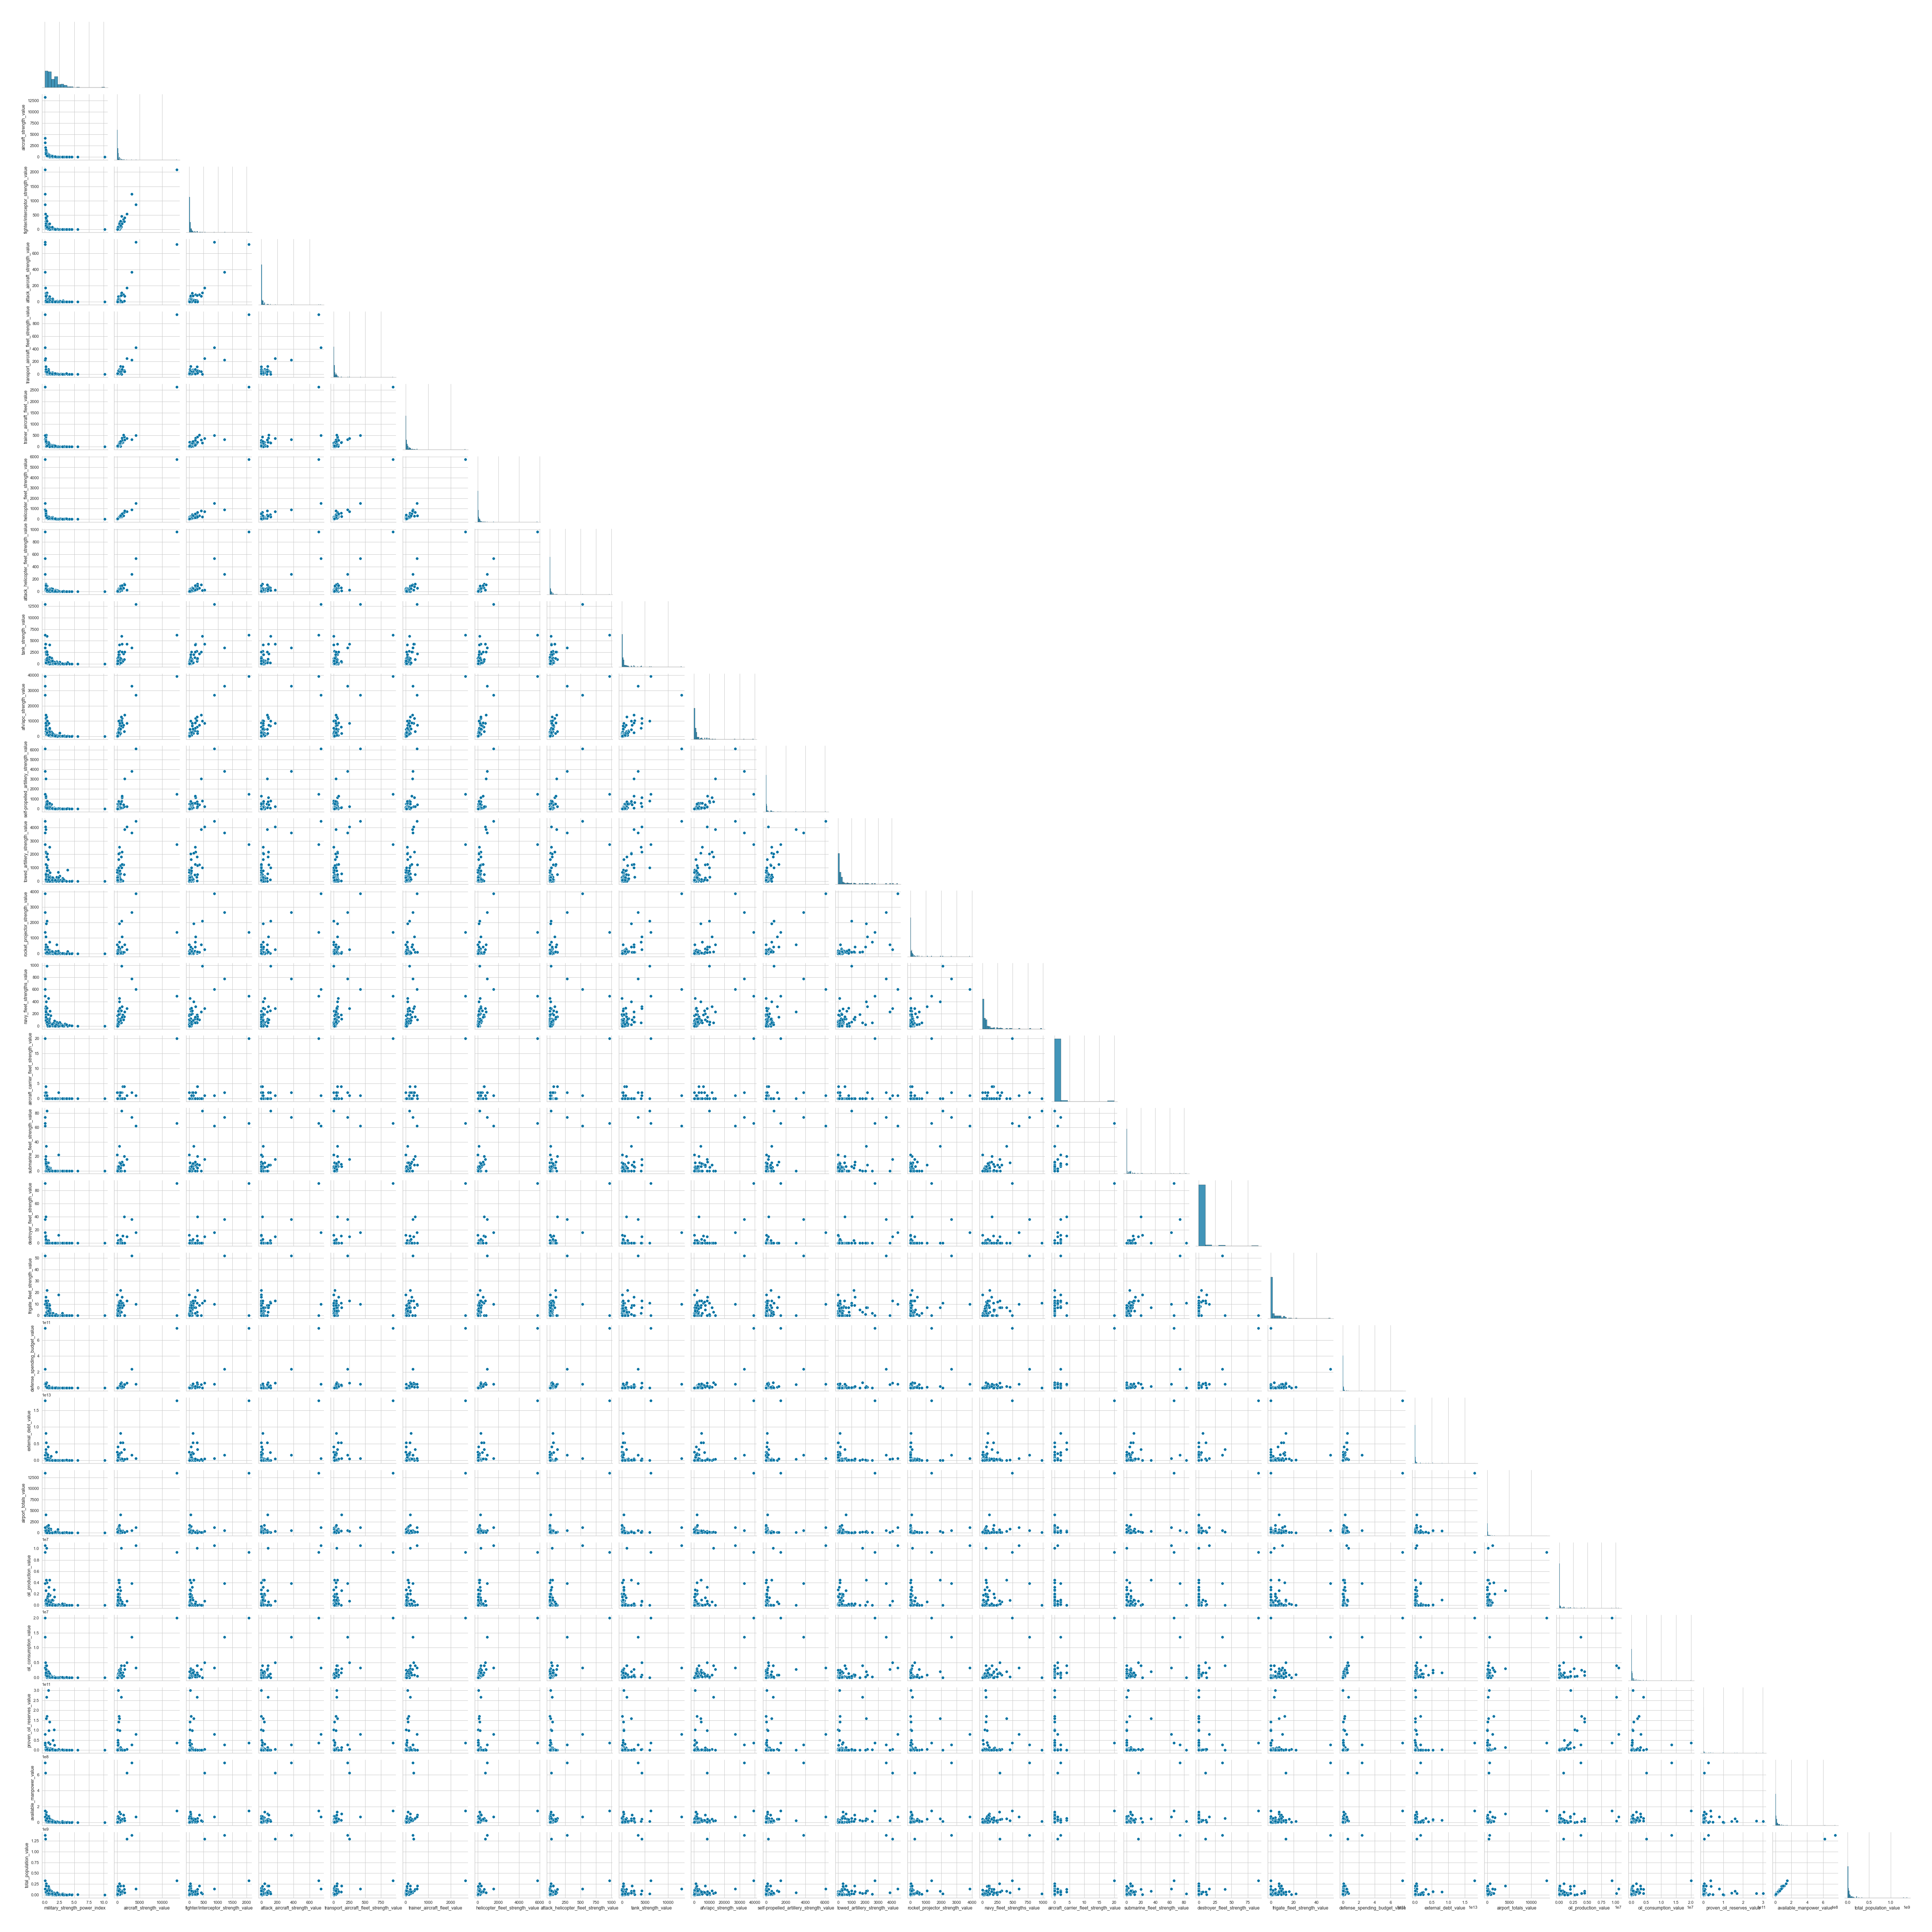

In [532]:
# sns.pairplot(df, palette="inferno", corner=True);

<IPython.core.display.Javascript object>


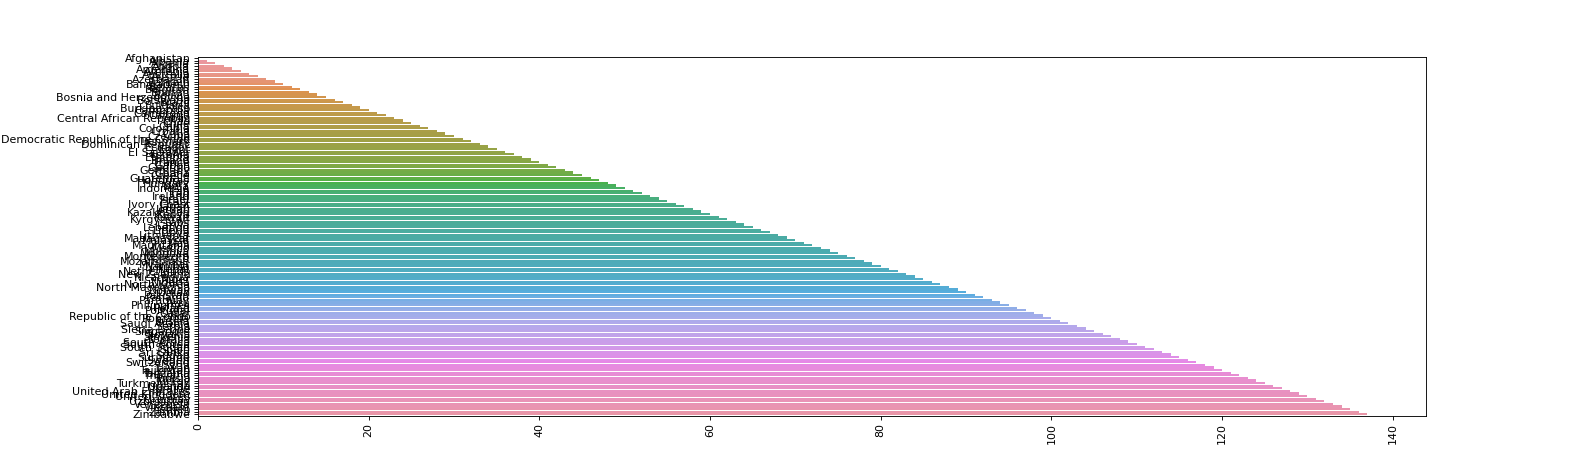

<IPython.core.display.Javascript object>


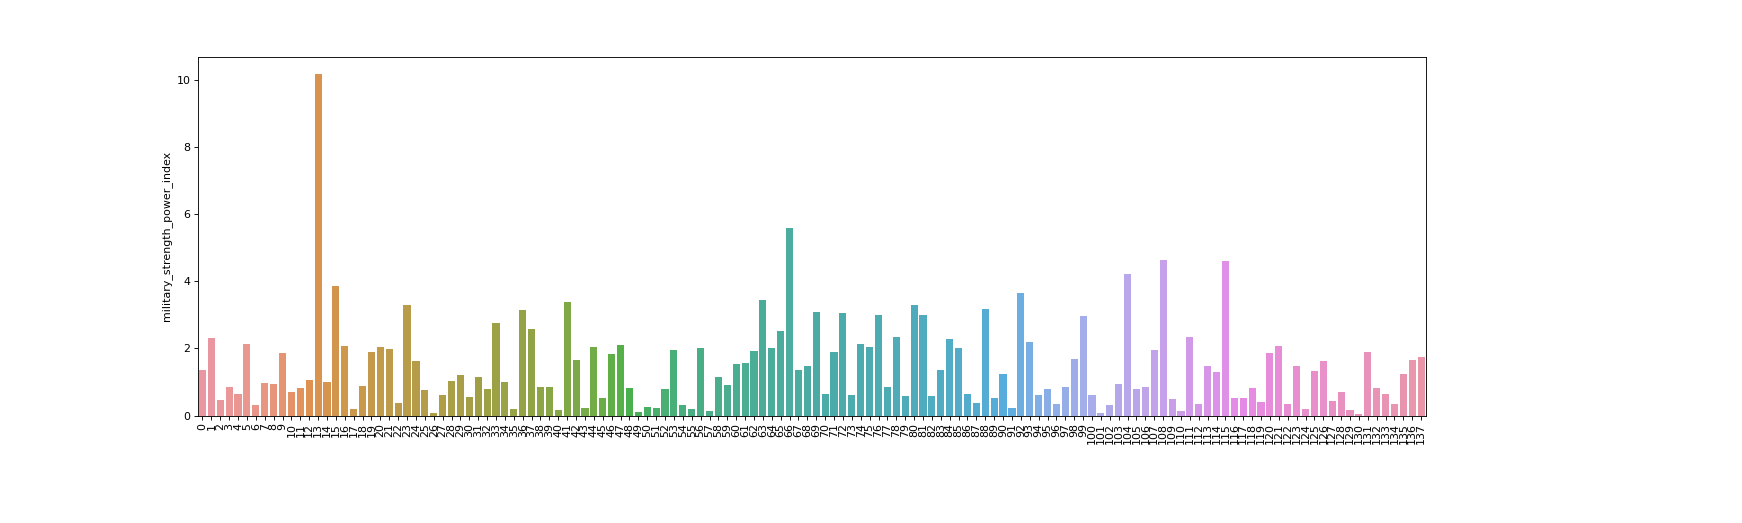

<IPython.core.display.Javascript object>


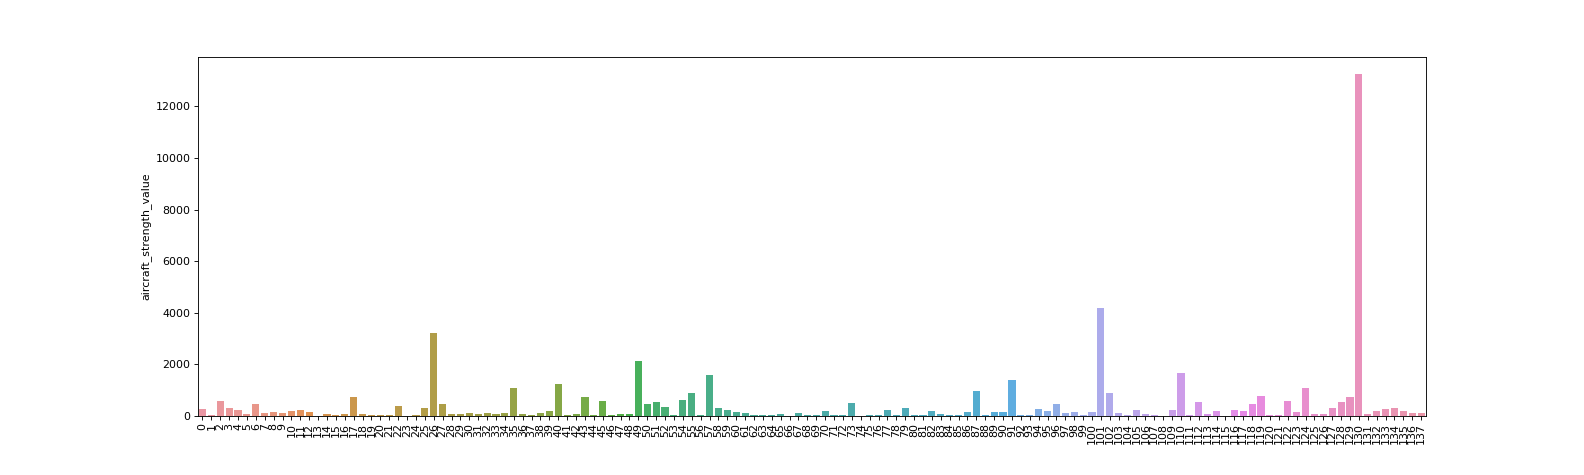

<IPython.core.display.Javascript object>


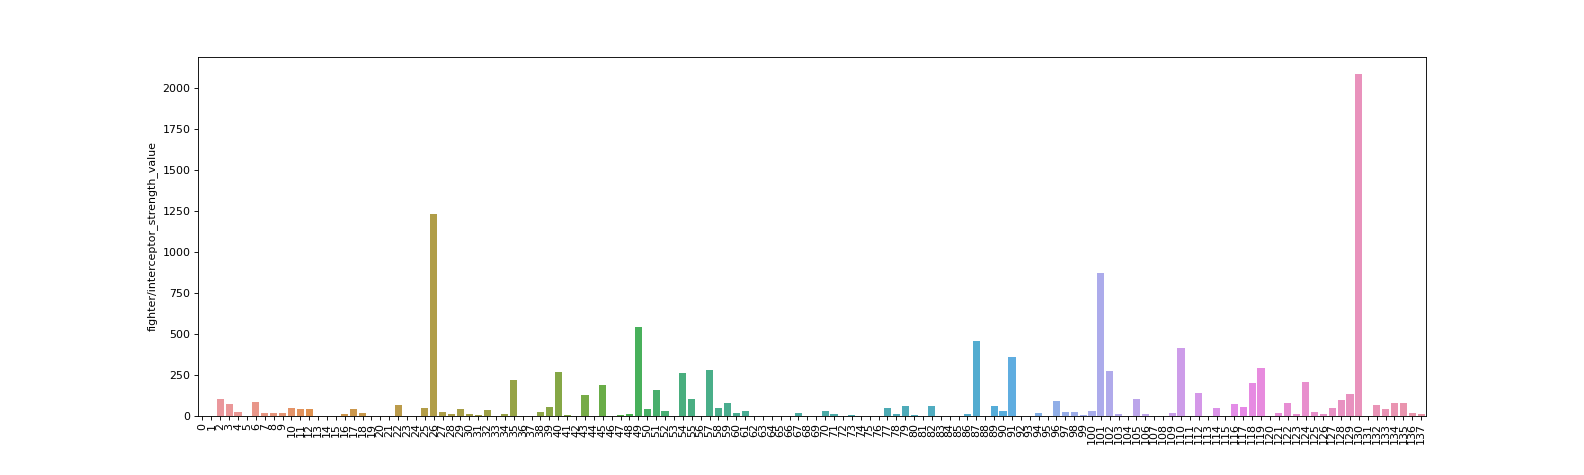

<IPython.core.display.Javascript object>


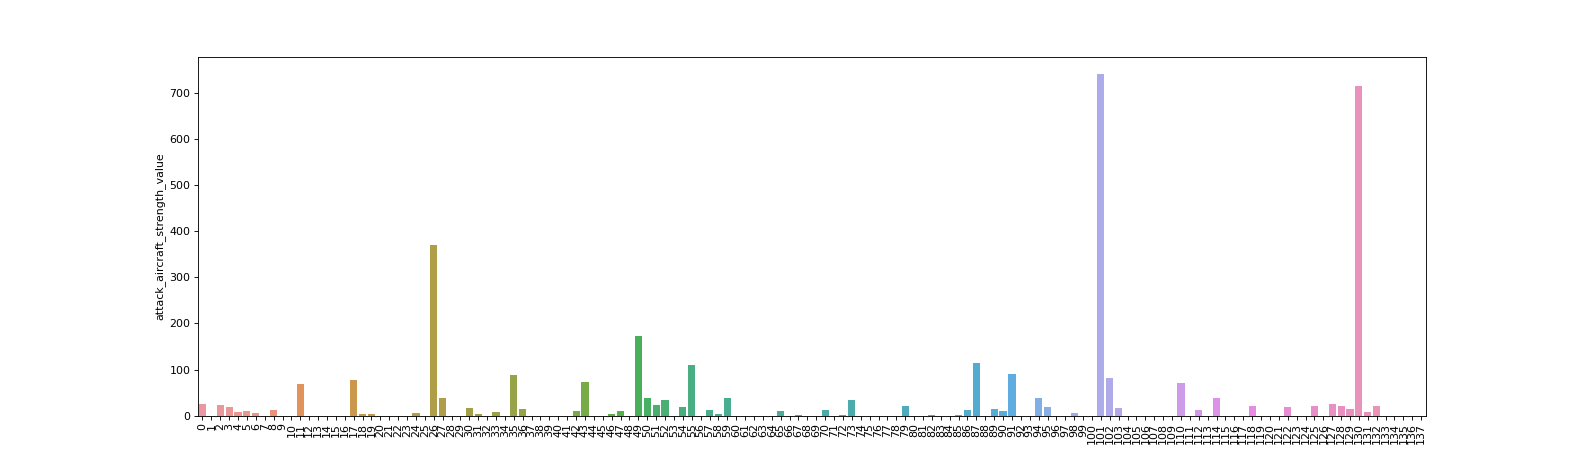

<IPython.core.display.Javascript object>


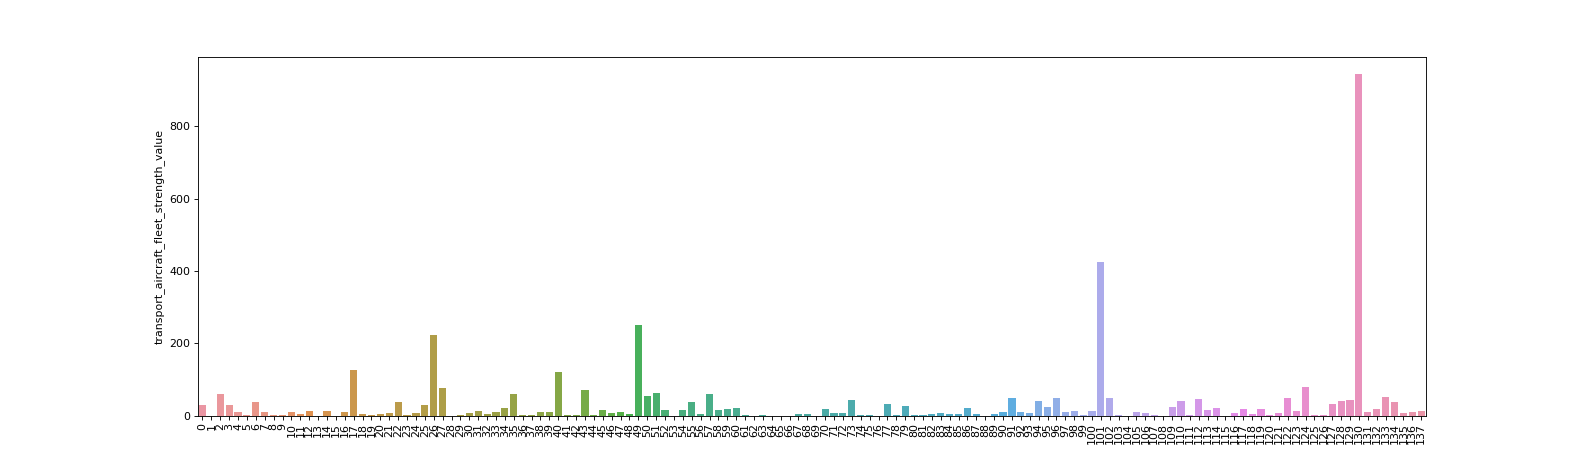

<IPython.core.display.Javascript object>


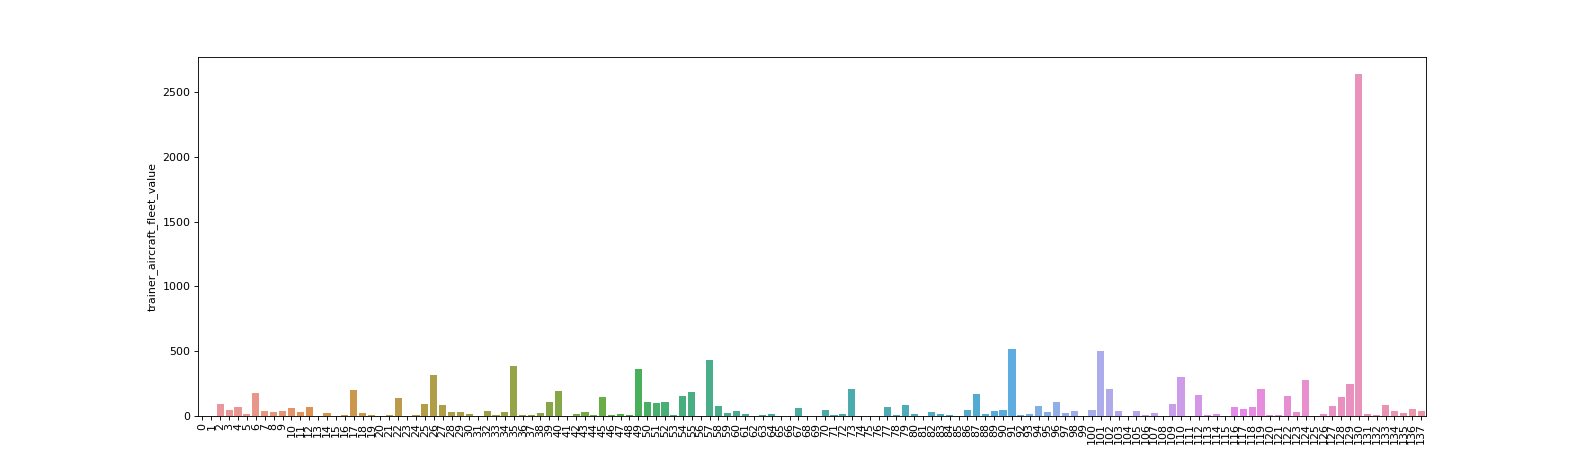

<IPython.core.display.Javascript object>


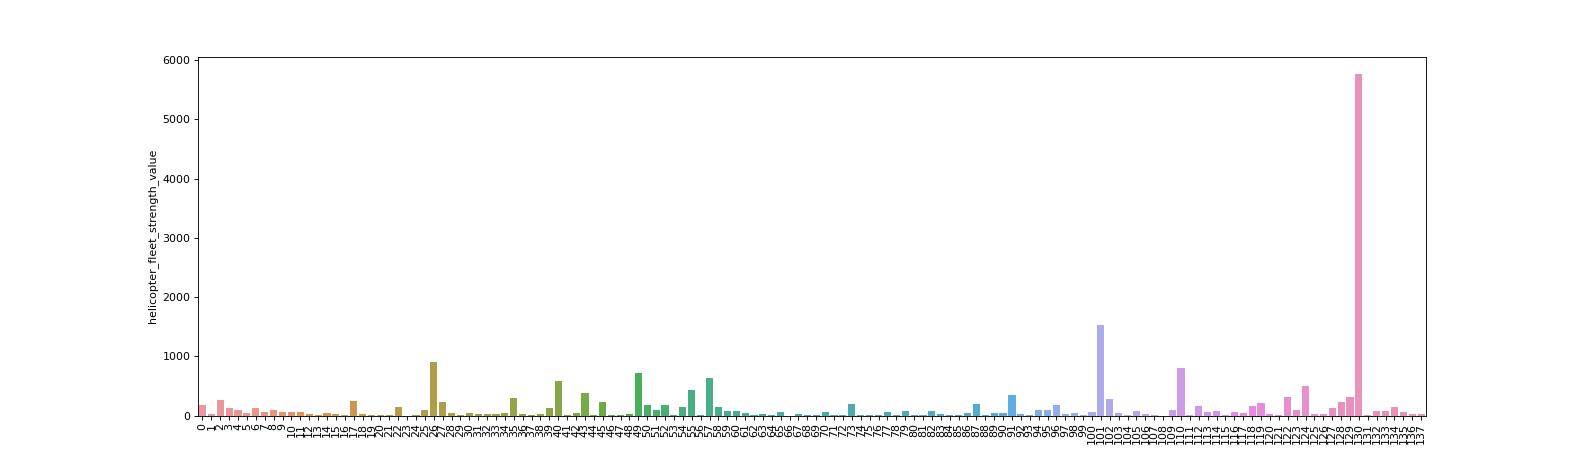

<IPython.core.display.Javascript object>


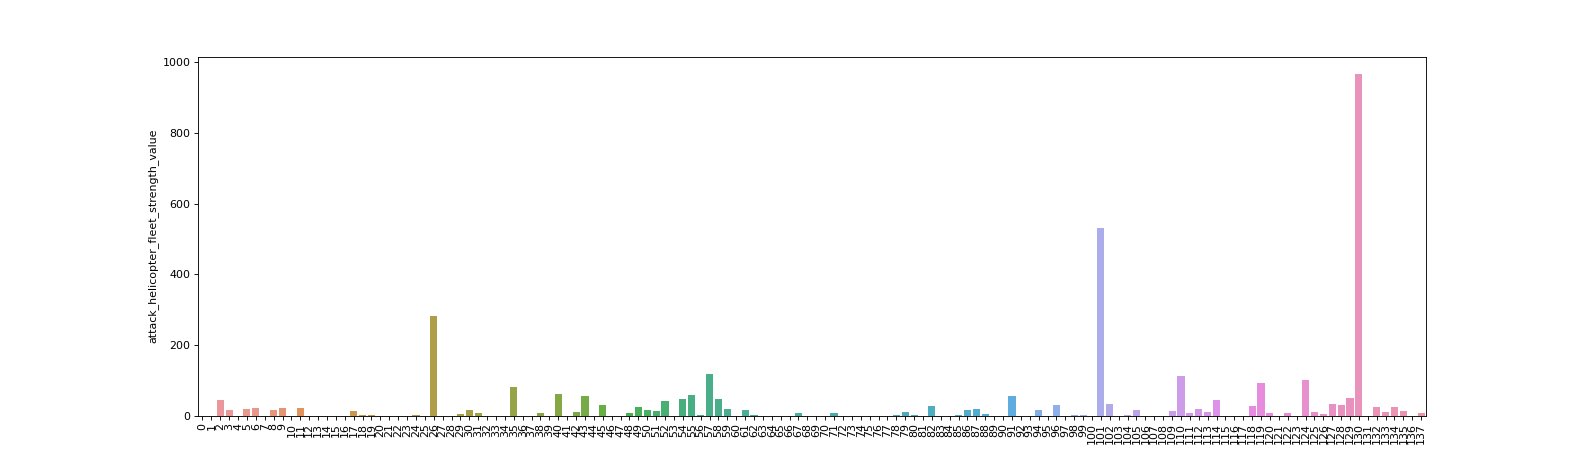

<IPython.core.display.Javascript object>


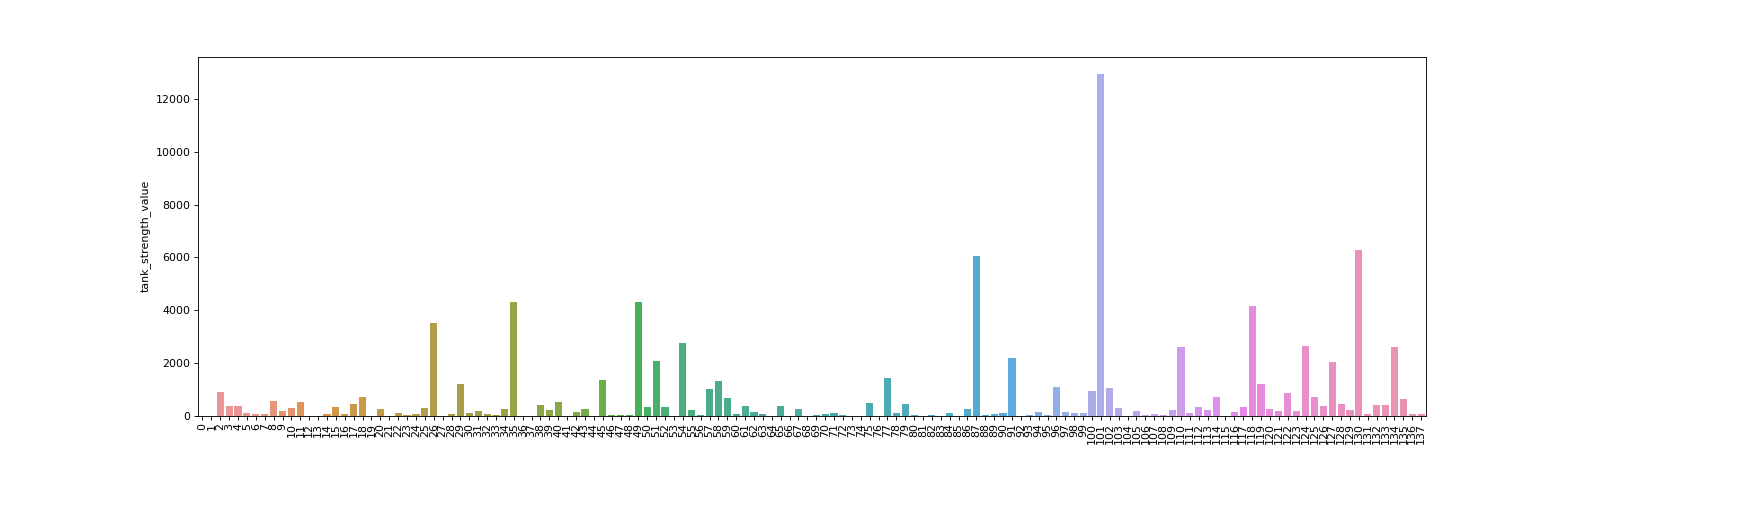

<IPython.core.display.Javascript object>


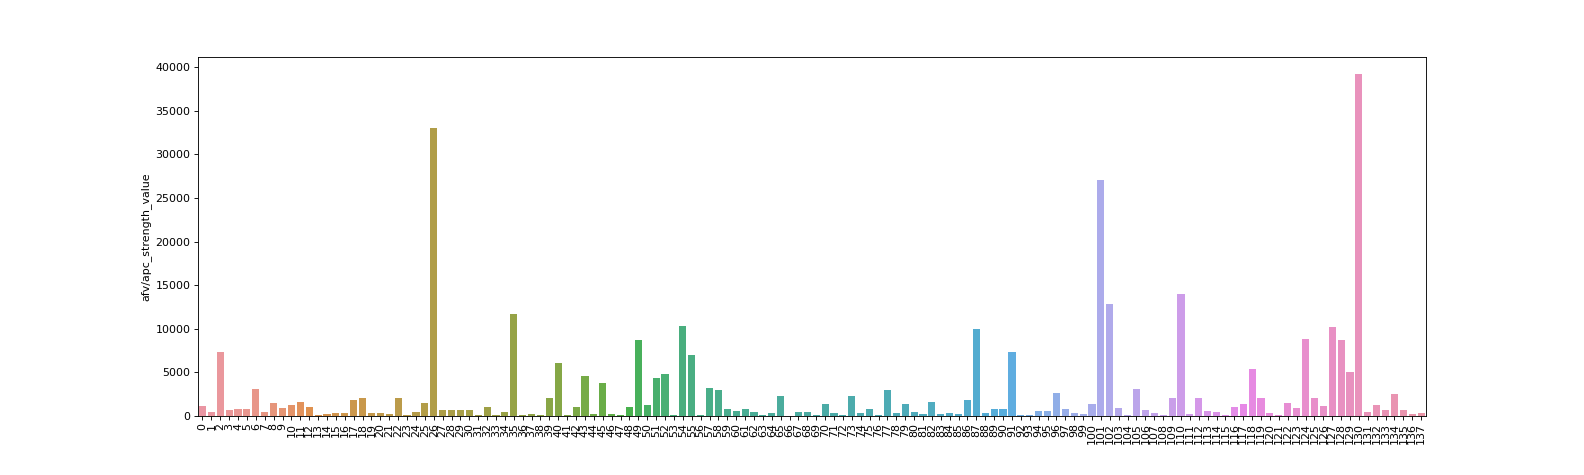

<IPython.core.display.Javascript object>


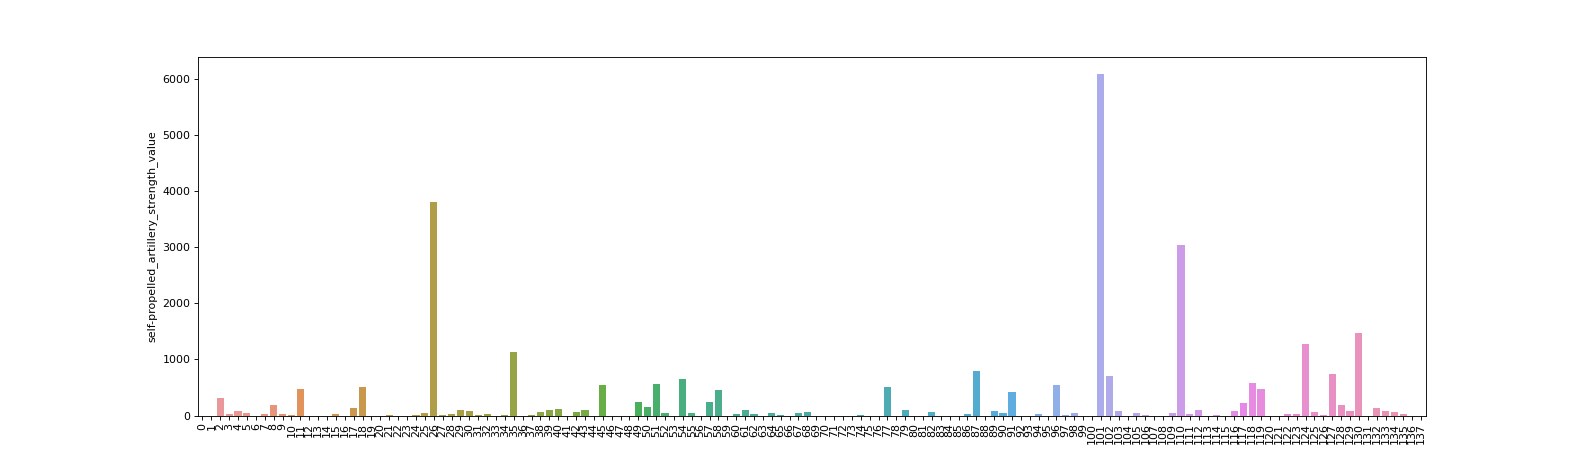

<IPython.core.display.Javascript object>


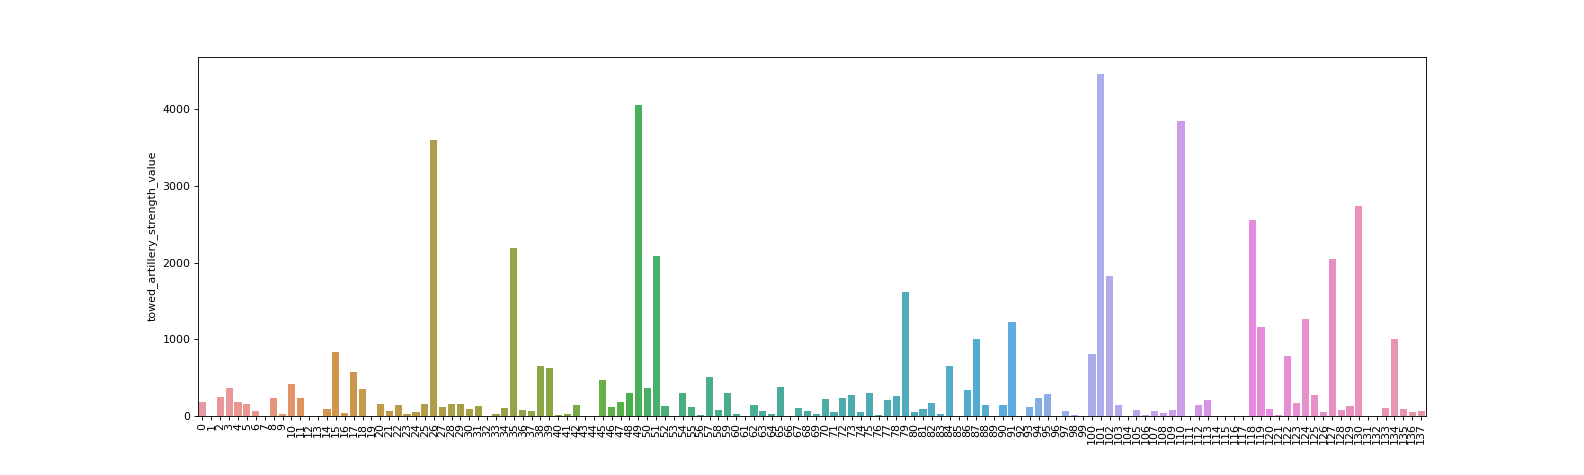

<IPython.core.display.Javascript object>


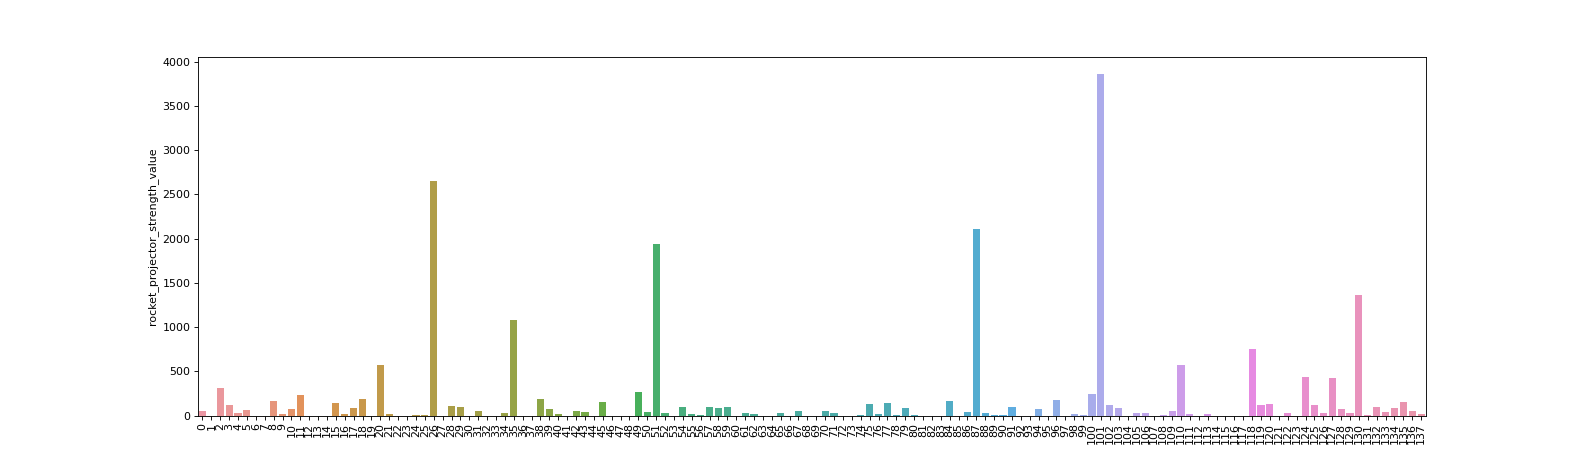

<IPython.core.display.Javascript object>


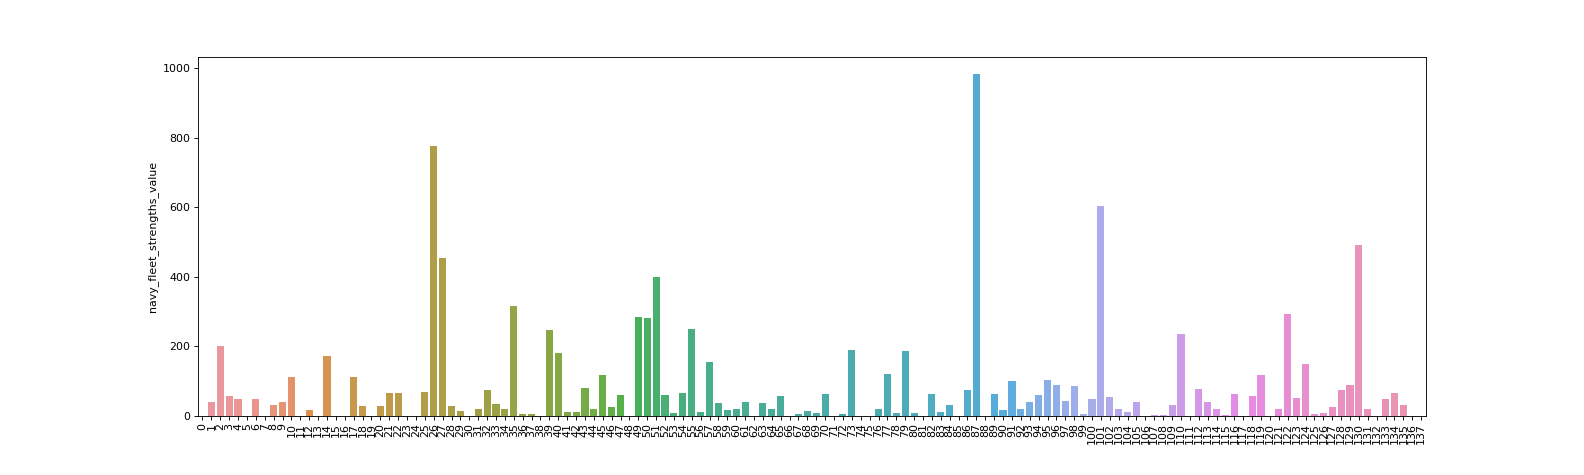

<IPython.core.display.Javascript object>


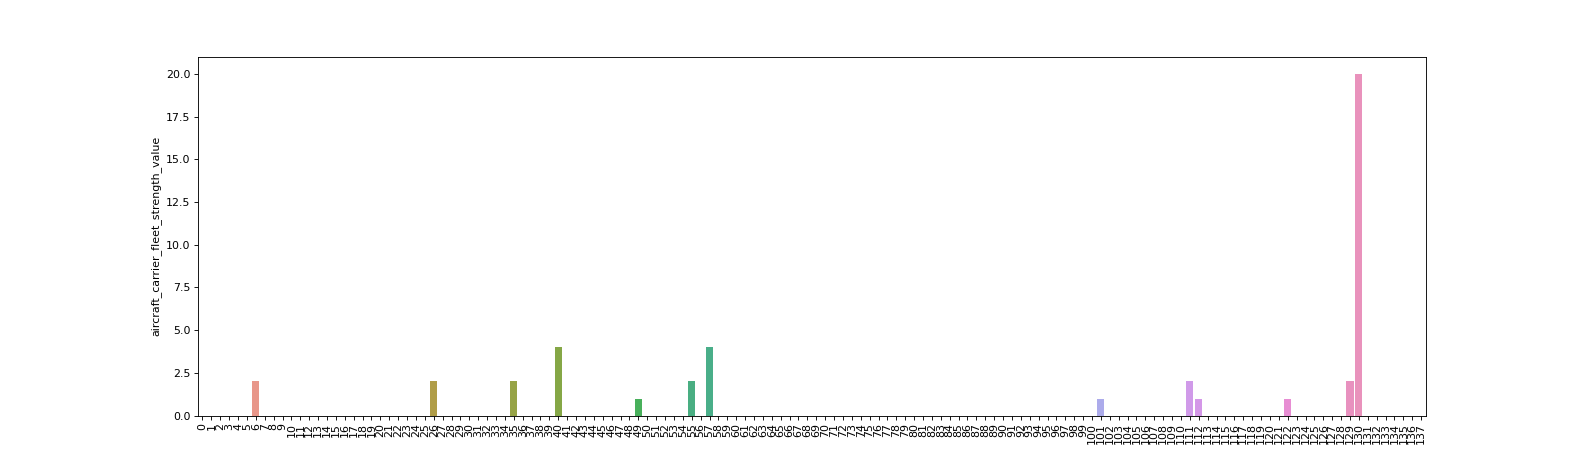

<IPython.core.display.Javascript object>


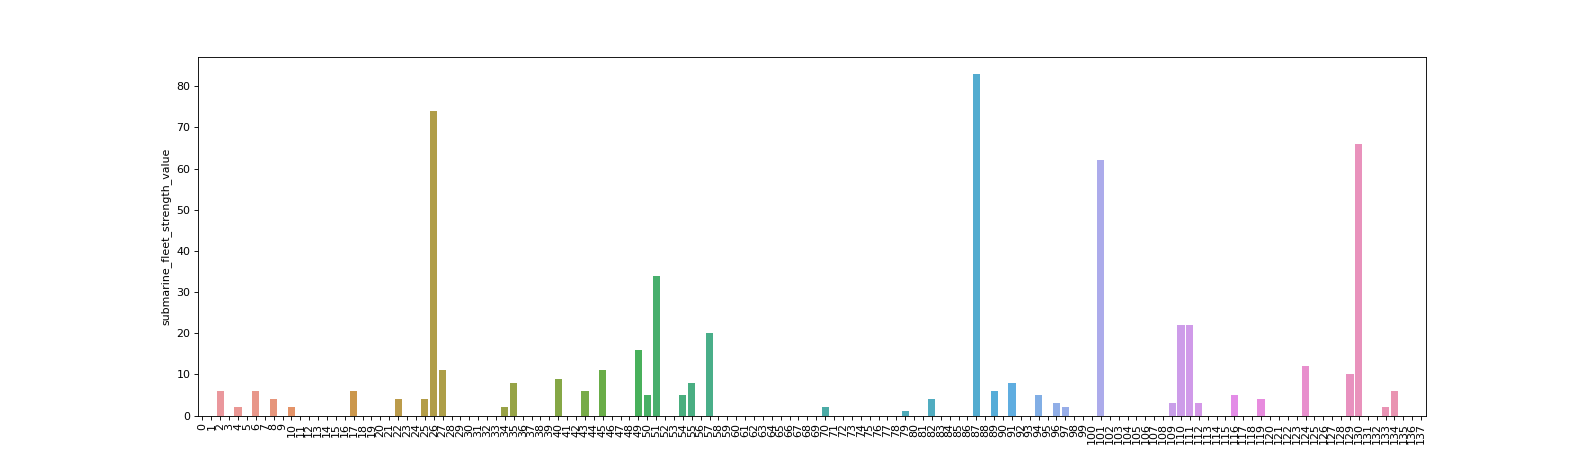

<IPython.core.display.Javascript object>


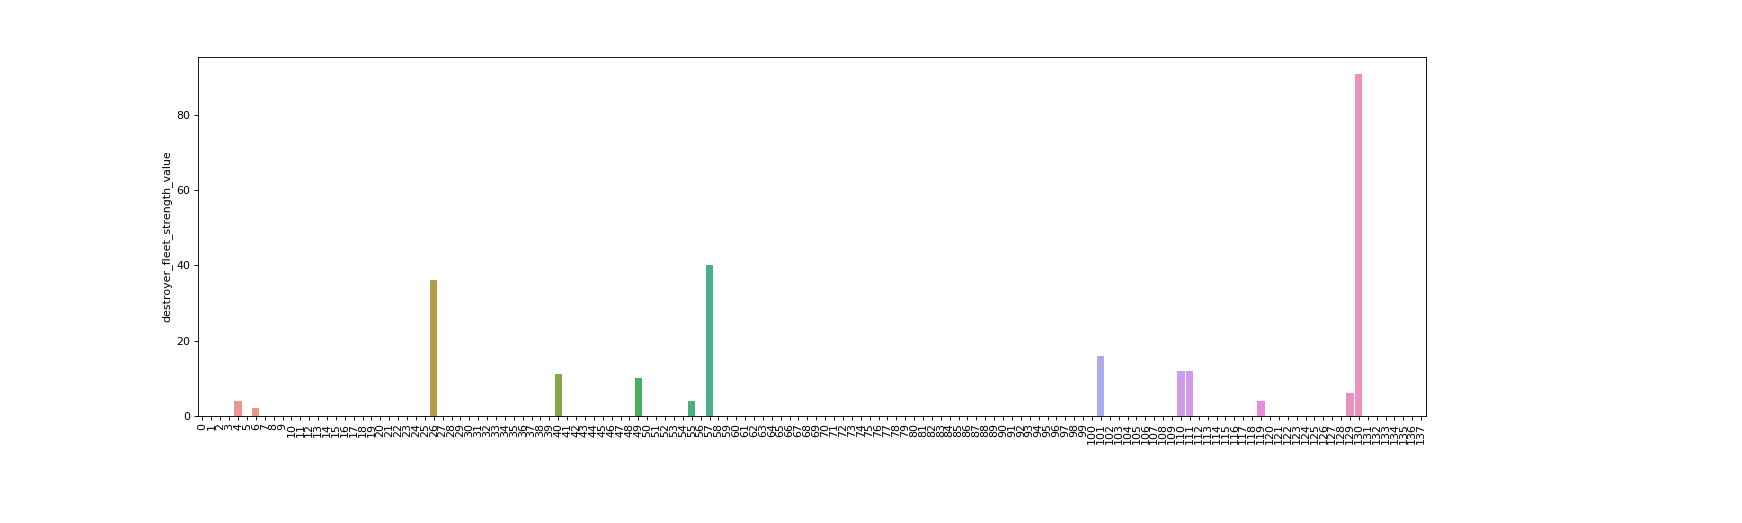

<IPython.core.display.Javascript object>


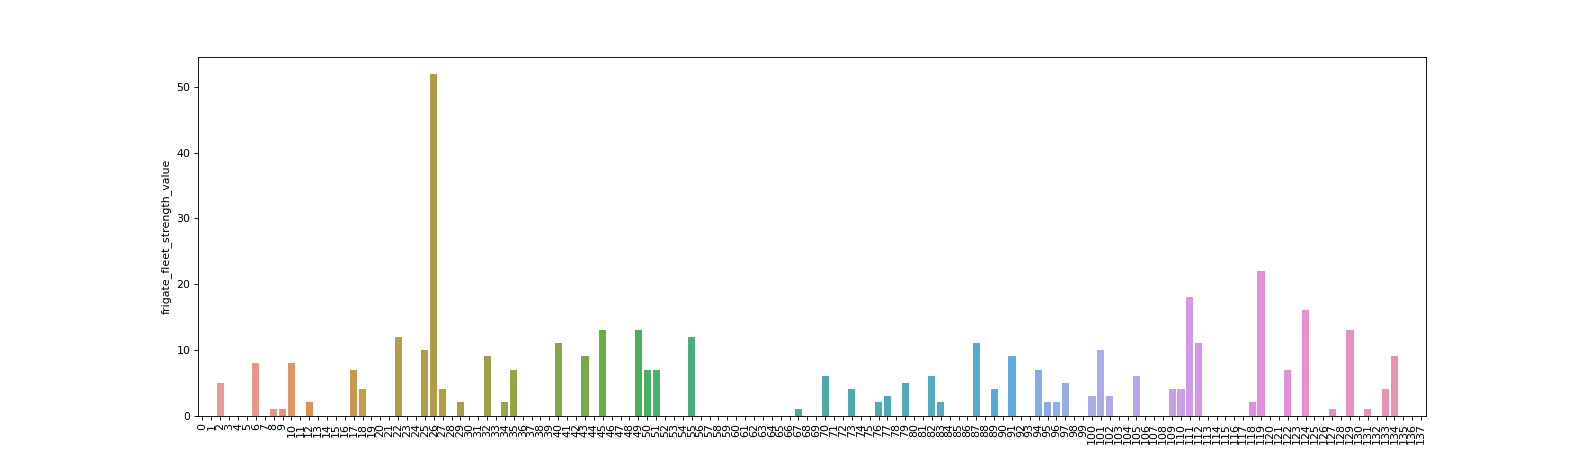

<IPython.core.display.Javascript object>


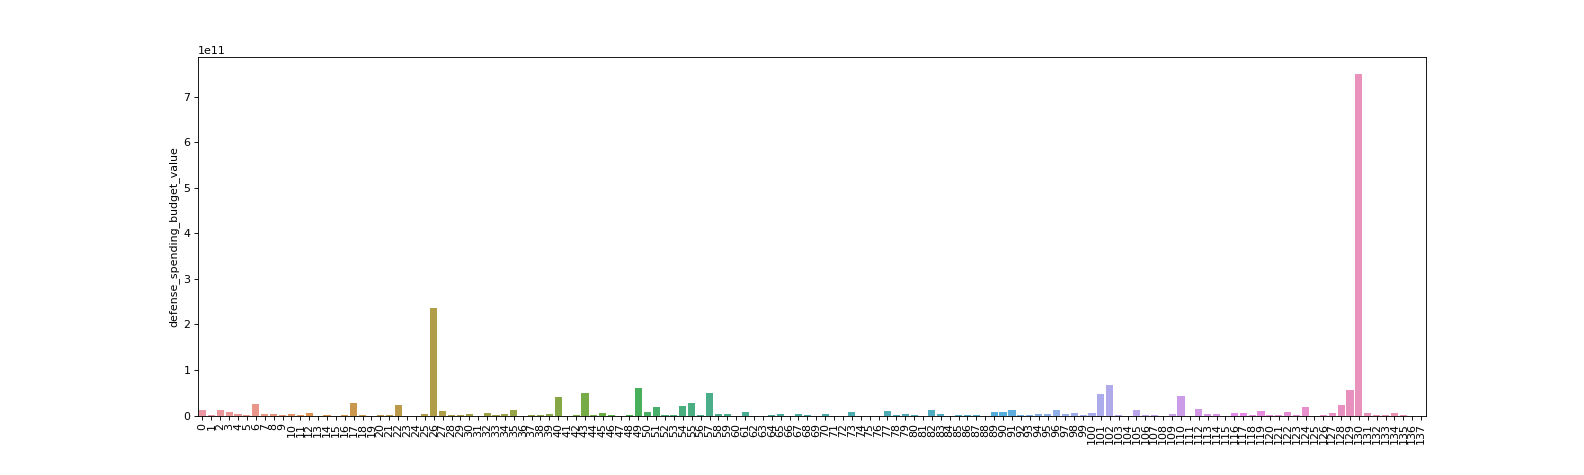

<IPython.core.display.Javascript object>


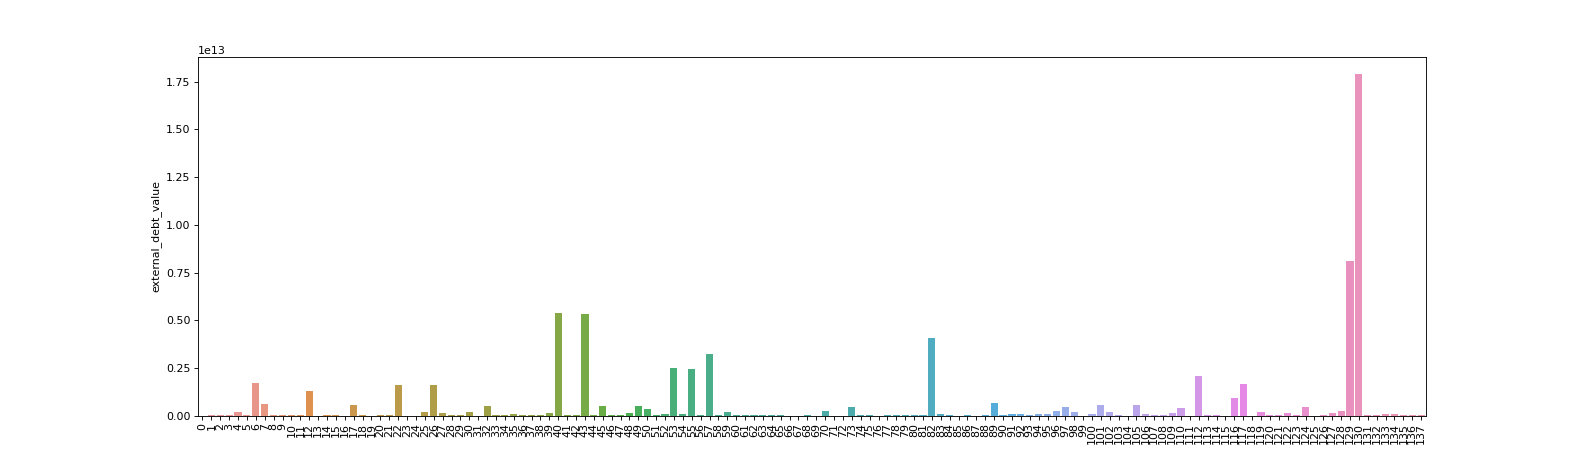

<IPython.core.display.Javascript object>


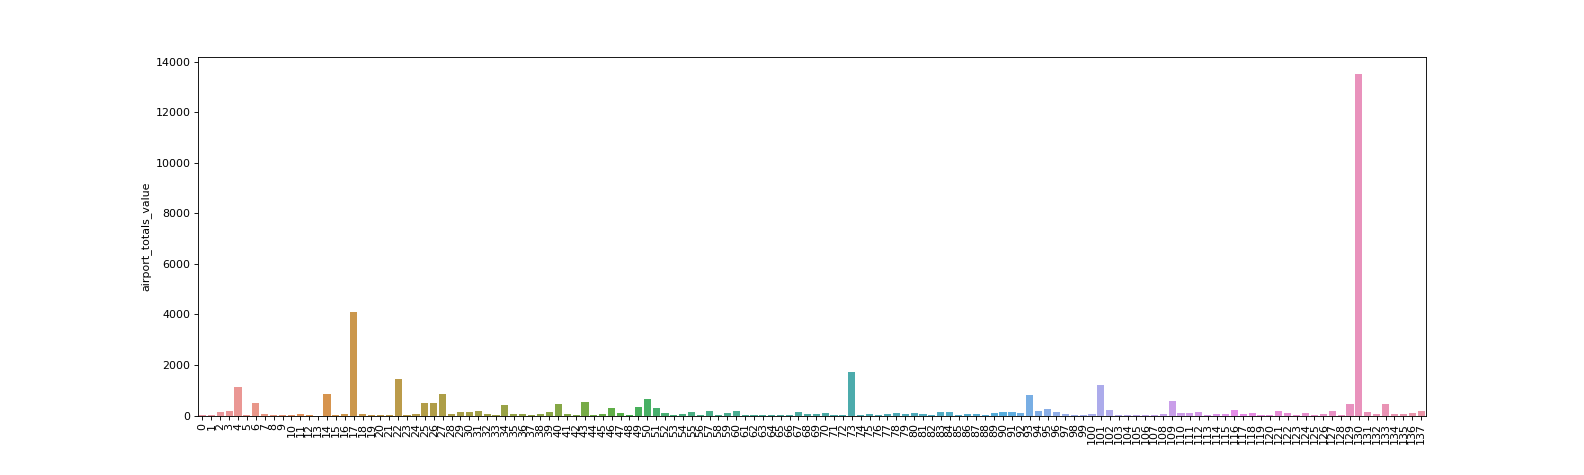

<IPython.core.display.Javascript object>


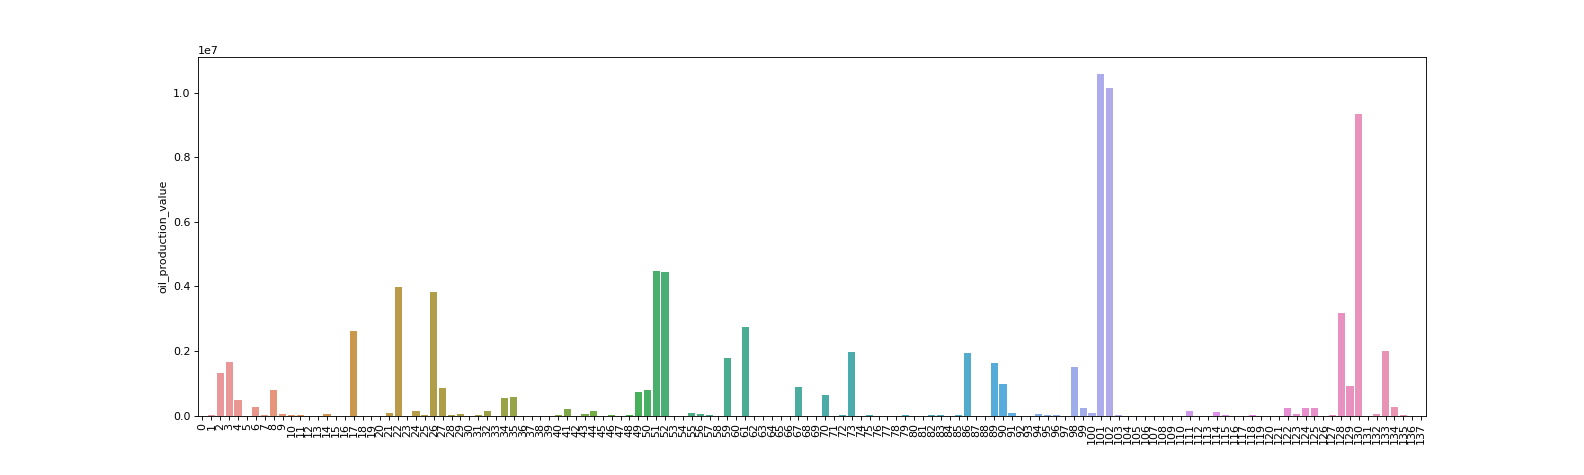

<IPython.core.display.Javascript object>


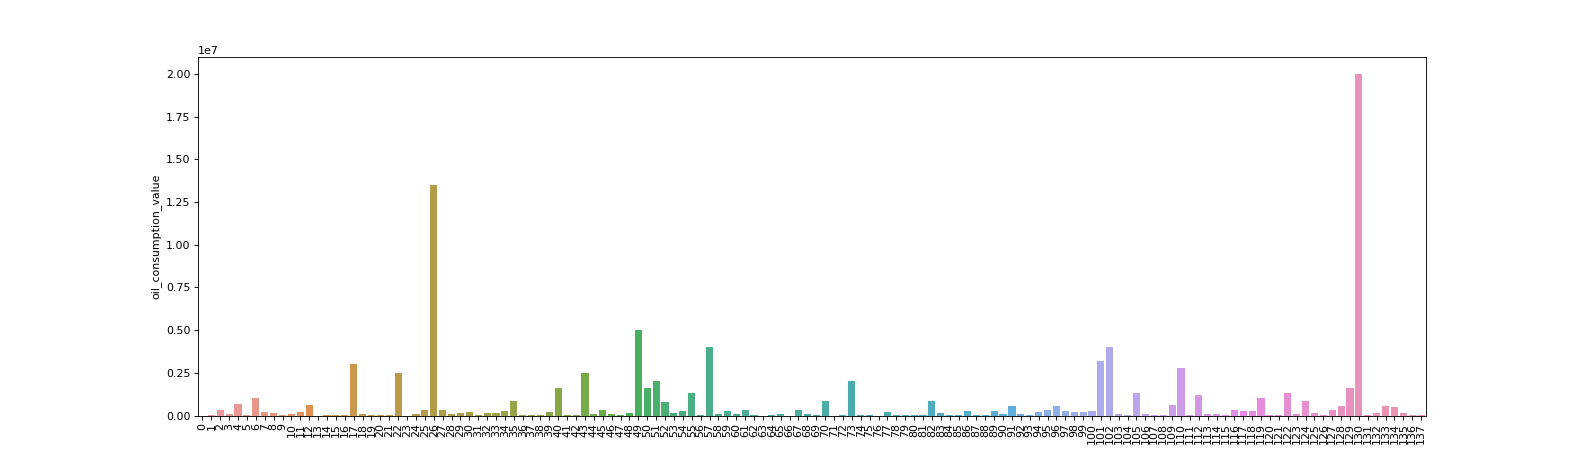

<IPython.core.display.Javascript object>


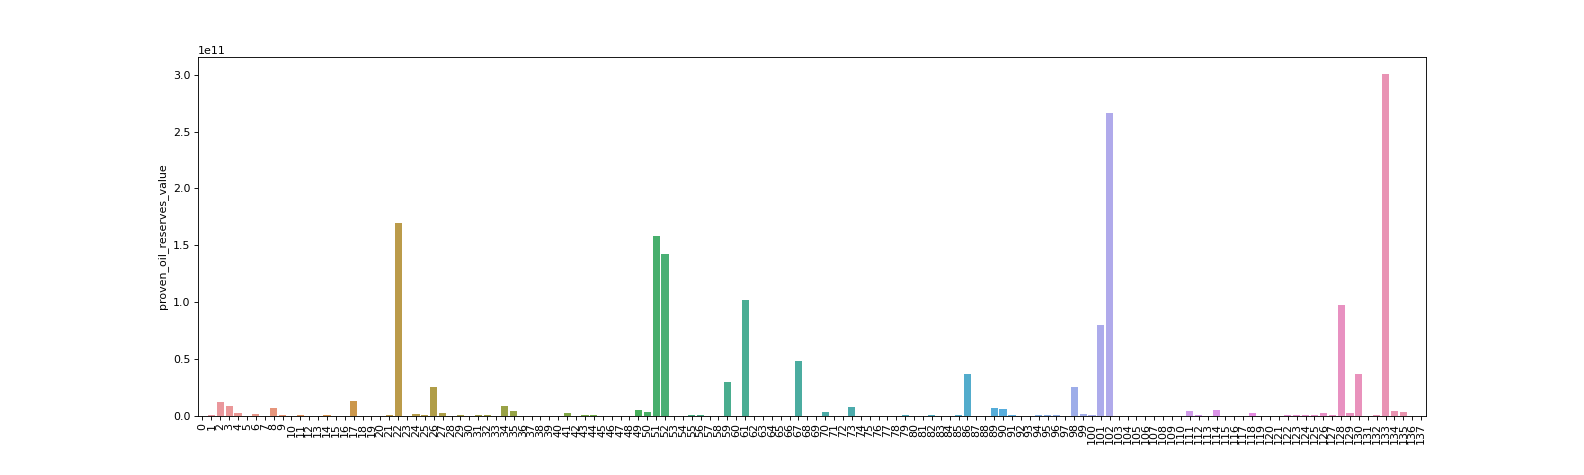

<IPython.core.display.Javascript object>


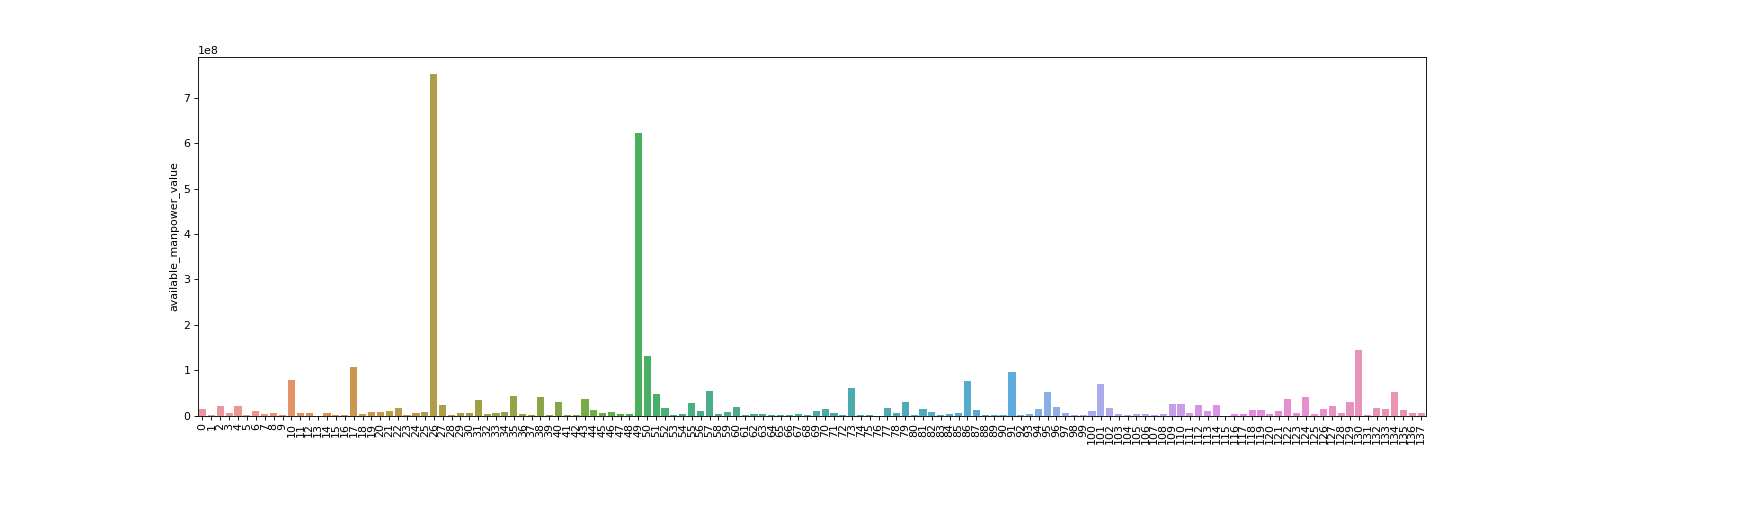

<IPython.core.display.Javascript object>


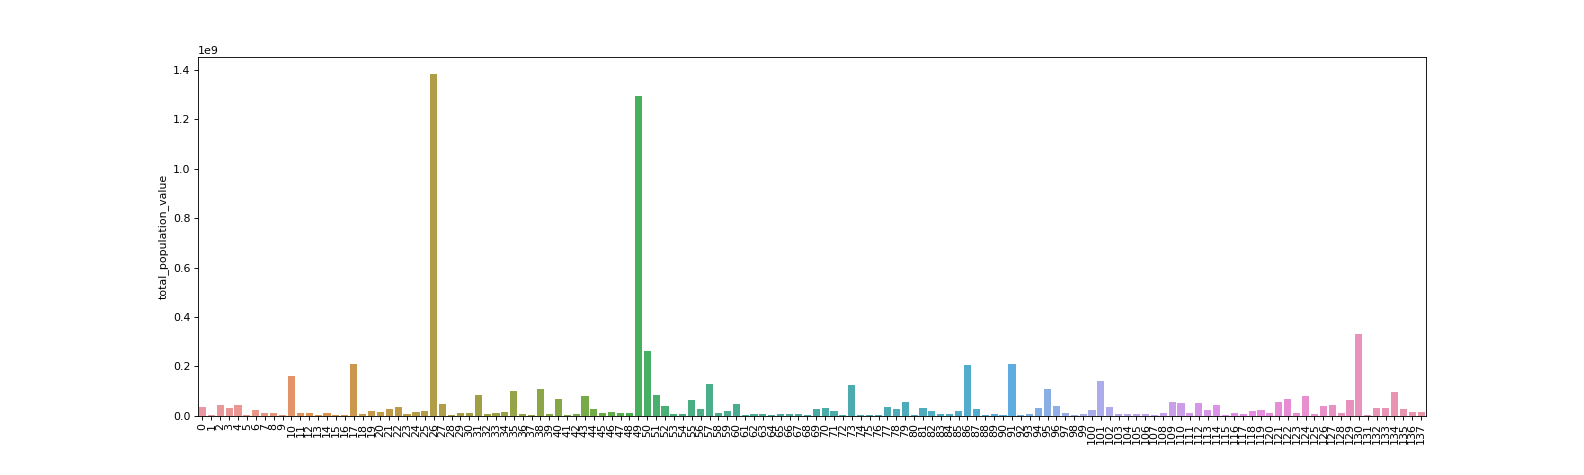

In [57]:
# for column in df:
#     plt.figure(figsize = (20, 6))
#     sns.barplot(y = df[column], x = df.index, data = df)
#     plt.xticks(rotation = 90);

In [58]:
# for i in df:
#     df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [61]:
# #for column in df:
# #        plt.figure(figsize=(20, 1))
# #        sns.boxplot(data=df, x=column);

<IPython.core.display.Javascript object>


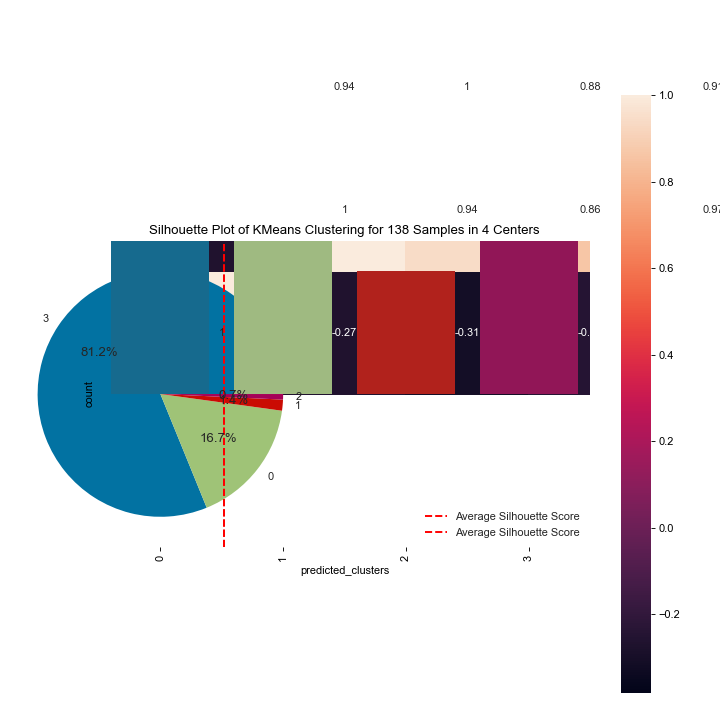

In [62]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(df.corr(), annot=True);

## Descriptive statistics

In [63]:
df.shape

(138, 27)

In [64]:
df.describe().T

count             mean  \
military_strength_power_index           138.000            1.461   
aircraft_strength_value                 138.000          388.471   
fighter/interceptor_strength_value      138.000           81.565   
attack_aircraft_strength_value          138.000           25.761   
transport_aircraft_fleet_strength_value 138.000           30.232   
trainer_aircraft_fleet_value            138.000           82.833   
helicopter_fleet_strength_value         138.000          154.065   
attack_helicopter_fleet_strength_value  138.000           25.623   
tank_strength_value                     138.000          646.565   
afv/apc_strength_value                  138.000         2485.696   
self-propelled_artillery_strength_value 138.000          212.159   
towed_artillery_strength_value          138.000          393.978   
rocket_projector_strength_value         138.000          156.935   
navy_fleet_strengths_value              138.000           76.362   
aircraft_carrier_fleet_strength_value   138.000            0.319   
submarine_fleet_strength_value          138.000            4.159   
destroyer_fleet_strength_value          138.000            1.797   
frigate_fleet_strength_value            138.000            2.964   
defense_spending_budget_value           138.000  13993631641.210   
external_debt_value                     138.000 519498263043.478   
airport_totals_value                    138.000          290.043   
oil_production_value                    138.000       585552.355   
oil_consumption_value                   138.000       702018.696   
proven_oil_reserves_value               138.000  11944118420.290   
available_manpower_value                138.000     25442969.935   
total_population_value                  138.000     53180584.652   

                                                      std           min  \
military_strength_power_index                       1.324         0.061   
aircraft_strength_value                          1231.982         0.000   
fighter/interceptor_strength_value                230.325         0.000   
attack_aircraft_strength_value                     94.528         0.000   
transport_aircraft_fleet_strength_value            92.330         0.000   
trainer_aircraft_fleet_value                      240.804         0.000   
helicopter_fleet_strength_value                   520.184         0.000   
attack_helicopter_fleet_strength_value             97.326         0.000   
tank_strength_value                              1515.464         0.000   
afv/apc_strength_value                           5410.546         0.000   
self-propelled_artillery_strength_value           688.029         0.000   
towed_artillery_strength_value                    805.782         0.000   
rocket_projector_strength_value                   484.381         0.000   
navy_fleet_strengths_value                        140.822         0.000   
aircraft_carrier_fleet_strength_value               1.804         0.000   
submarine_fleet_strength_value                     12.719         0.000   
destroyer_fleet_strength_value                      9.195         0.000   
frigate_fleet_strength_value                        6.053         0.000   
defense_spending_budget_value             67311892724.125  13000000.000   
external_debt_value                     1847251527661.875 539400000.000   
airport_totals_value                             1212.967         2.000   
oil_production_value                          1667138.897         0.000   
oil_consumption_value                         2168810.056      2000.000   
proven_oil_reserves_value                 42750903273.129         0.000   
available_manpower_value                     84506975.276    132740.000   
total_population_value                      165108987.399    597927.000   

                                                   25%             50%  \
military_strength_power_index                    0.575           1.034   
aircraft_strength_value        

In [65]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.728
available_manpower_value                  7.377
total_population_value                    7.110
external_debt_value                       7.052
oil_consumption_value                     6.874
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
proven_oil_reserves_value                 4.881
submarine_fleet_strength_value            4.675
afv/apc_strength_value                  

In [245]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.850
available_manpower_value                  7.377
total_population_value                    7.110
external_debt_value                       7.052
oil_consumption_value                     6.874
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
proven_oil_reserves_value                 4.881
submarine_fleet_strength_value            4.790
afv/apc_strength_value                  

In [66]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, 
               '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew,
               '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   9.959267416955777  means that the distribution is approx.   highly skewed 
A skewness value of   9.844767047481588  means that the distribution is approx.   highly skewed 
A skewness value of   9.771993009249078  means that the distribution is approx.   highly skewed 
A skewness value of   9.496532868859475  means that the distribution is approx.   highly skewed 
A skewness value of   9.035121167203796  means that the distribution is approx.   highly skewed 
A skewness value of   8.789333213231357  means that the distribution is approx.   highly skewed 
A skewness value of   7.95096255063359  means that the distribution is approx.   highly skewed 
A skewness value of   7.882557750772219  means that the distribution is approx.   highly skewed 
A skewness value of   7.727880185698528  means that the distribution is approx.   highly skewed 
A skewness value of   7.3768909158991285  means that the distribution is approx.   highly skewed 
A skewness value of   7.109548

In [67]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
attack_helicopter_fleet_strength_value     69.606
destroyer_fleet_strength_value             68.279
external_debt_value                        59.907
available_manpower_value                   57.864
oil_consumption_value                      54.228
total_population_value                     53.839
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.422
proven_oil_reserves_value                  25.894


In [68]:
#Calculating Kurtosis 

kurtosis_limit = 7 
# This is our threshold-limit to evaluate skewness.
# Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
attack_helicopter_fleet_strength_value     69.606
destroyer_fleet_strength_value             68.279
external_debt_value                        59.907
available_manpower_value                   57.864
oil_consumption_value                      54.228
total_population_value                     53.839
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.422
proven_oil_reserves_value                  25.894


# Data Preprocessing | Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [69]:
from pyclustertend import hopkins

In [70]:
df_ = df.drop("country", axis=1)

In [71]:
hopkins(df_, df.shape[0])

0.07031783653438409

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
hopkins(scale(df_), df.shape[0])

0.07506302461222623

In [73]:
hopkins(MinMaxScaler().fit_transform(df_), df_.shape[0])

0.08347547618426034

In [74]:
hopkins(StandardScaler().fit_transform(df_), df_.shape[0])

0.07453952181766875

## Clustering with K-means

In [75]:
X = df.drop("country", axis = 1)
X_scaled = scale(X)
X_scaled

array([[-0.08817076, -0.10465985, -0.35542142, ..., -0.28040649,
        -0.13203321, -0.1108734 ],
       [ 0.64658594, -0.30099225, -0.35542142, ..., -0.27645539,
        -0.28412667, -0.30468338],
       [-0.75409851,  0.13240542,  0.09340232, ...,  0.00600721,
        -0.05583959, -0.0700451 ],
       ...,
       [-0.16639927, -0.17879366, -0.01989299, ..., -0.20997689,
        -0.16836947, -0.14900859],
       [ 0.14075375, -0.22848776, -0.2769862 , ..., -0.28040649,
        -0.22893125, -0.22330301],
       [ 0.22512228, -0.24315159, -0.3118463 , ..., -0.28040649,
        -0.23585307, -0.23798124]])

In [76]:
df.shape

(138, 27)

In [77]:
df.head(3)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2                13000000000.000       6260000000.000                   157   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   
1             16000.000              42500.000              168300000.000   
2           1306000.000             325000.000            12200000000.000   

   available_manpower_value  total_population_value  
0              14325743.000            34940837.000  
1               1519438.000             3057220.000  
2              20741263.000            41657488.000

In [78]:
X_scaled.shape

(138, 26)

In [79]:
X.head(3)

military_strength_power_index  aircraft_strength_value  \
0                          1.344                      260   
1                          2.314                       19   
2                          0.466                      551   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2                13000000000.000       6260000000.000                   157   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   
1             16000.000              42500.000              168300000.000   
2           1306000.000             325000.000            12200000000.000   

   available_manpower_value  total_population_value  
0              14325743.000            34940837.000  
1               1519438.000             3057220.000  
2              20741263.000            41657488.000

In [80]:
KMeans(random_state = 101).fit_predict(X_scaled)
# X["clusters"] = KMeans(random_state = 101).fit_predict(X_scaled)
# X["clusters"] = KMeans(random_state = 101).fit(X_scaled).labels_

<IPython.core.display.Javascript object>

array([0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5,
       0, 5, 0, 0, 0, 6, 5, 3, 3, 0, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 7,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 5, 3, 5, 1, 0,
       0, 3, 5, 0, 0, 0])

### Elbow Method 
##### We use this method to find optimal k value by looking up to break point of graph. 

In [86]:
ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(X_scaled).inertia_)
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'elbow method')

In [87]:
ssd # sum of squared distance

[1913.4825726106826,
 1312.3964106007531,
 1045.8678492319914,
 849.001749180456,
 744.2002246322529,
 609.8487829843649,
 511.87139844261316,
 448.4956396877131]

In [88]:
pd.Series(ssd).diff()

0        NaN
1   -601.086
2   -266.529
3   -196.866
4   -104.802
5   -134.351
6    -97.977
7    -63.376
dtype: float64

In [89]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1     NaN
2 601.086
3 266.529
4 196.866
5 104.802
6 134.351
7  97.977
8  63.376

<IPython.core.display.Javascript object>


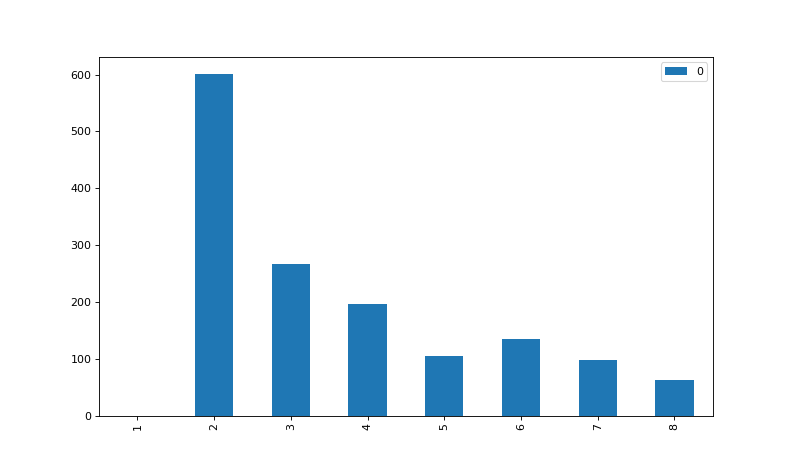

In [90]:
# df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


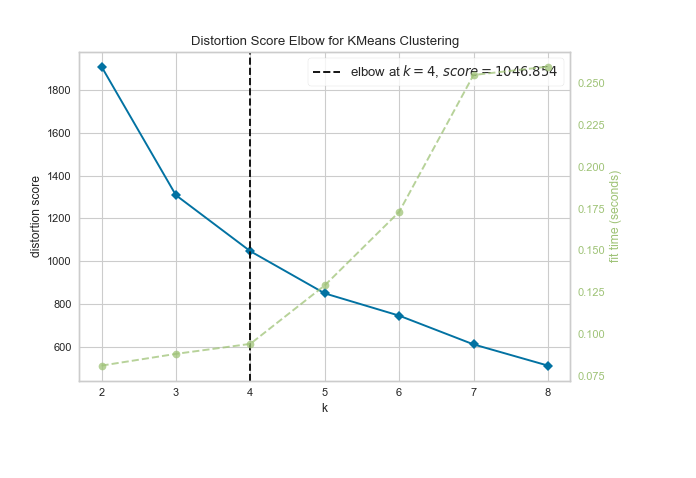

In [286]:
# from yellowbrick.cluster import KElbowVisualizer

# visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
# visualizer.fit(X_scaled)        # Fit the data to the visualizer
# visualizer.show();

### Silhouette analysis

In [91]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, KMeans(random_state = 101).fit_predict(X_scaled))

<IPython.core.display.Javascript object>

0.4663736308553614

In [92]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(X_scaled, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(X_scaled))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")

<IPython.core.display.Javascript object>

For n_clusters=2, the silhouette score is 0.8633678242036664


<IPython.core.display.Javascript object>

For n_clusters=3, the silhouette score is 0.8002153355737943


<IPython.core.display.Javascript object>

For n_clusters=4, the silhouette score is 0.5173329316453612


<IPython.core.display.Javascript object>

For n_clusters=5, the silhouette score is 0.47397893538005575


<IPython.core.display.Javascript object>

For n_clusters=6, the silhouette score is 0.49172152107034267


<IPython.core.display.Javascript object>

For n_clusters=7, the silhouette score is 0.4761723268387499


<IPython.core.display.Javascript object>

For n_clusters=8, the silhouette score is 0.4663736308553614


In [94]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [95]:
KMeans(n_clusters =4, random_state=101).fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [96]:
X.head(3)

military_strength_power_index  aircraft_strength_value  \
0                          1.344                      260   
1                          2.314                       19   
2                          0.466                      551   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2                13000000000.000       6260000000.000                   157   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   
1             16000.000              42500.000              168300000.000   
2           1306000.000             325000.000            12200000000.000   

   available_manpower_value  total_population_value  
0              14325743.000            34940837.000  
1               1519438.000             3057220.000  
2              20741263.000            41657488.000

In [97]:
X["clusters"] = KMeans(n_clusters =4, random_state=101).fit_predict(X_scaled)

In [98]:
X.head(3)

military_strength_power_index  aircraft_strength_value  \
0                          1.344                      260   
1                          2.314                       19   
2                          0.466                      551   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2                13000000000.000       6260000000.000                   157   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   
1             16000.000              42500.000              168300000.000   
2           1306000.000             325000.000            12200000000.000   

   available_manpower_value  total_population_value  clusters  
0              14325743.000            34940837.000         3  
1               1519438.000             3057220.000         3  
2              20741263.000            41657488.000         0

In [99]:
X["clusters"].unique()

array([3, 0, 1, 2])

In [100]:
df.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [101]:
df.iloc[130]

country                                        United States
military_strength_power_index                          0.061
aircraft_strength_value                                13264
fighter/interceptor_strength_value                      2085
attack_aircraft_strength_value                           715
transport_aircraft_fleet_strength_value                  945
trainer_aircraft_fleet_value                            2643
helicopter_fleet_strength_value                         5768
attack_helicopter_fleet_strength_value                   967
tank_strength_value                                     6289
afv/apc_strength_value                                 39253
self-propelled_artillery_strength_value                 1465
towed_artillery_strength_value                          2740
rocket_projector_strength_value                         1366
navy_fleet_strengths_value                           490.000
aircraft_carrier_fleet_strength_value                 20.000
submarine_fleet_strength

In [102]:
df1 = df.copy()

In [103]:
df1["actual_clusters"] = ""

In [104]:
df1["predicted_clusters"] = KMeans(n_clusters =4, random_state=101).fit_predict(X_scaled)
df1.head(3)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2                13000000000.000       6260000000.000                   157   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   
1             16000.000              42500.000              168300000.000   
2           1306000.000             325000.000            12200000000.000   

   available_manpower_value  total_population_value actual_clusters  \
0              14325743.000            34940837.000                   
1               1519438.000             3057220.000                   
2              20741263.000            41657488.000                   

   predicted_clusters  
0                   3  
1                   3  
2                   0

In [105]:
df1["predicted_clusters"].value_counts()

3    112
0     23
1      2
2      1
Name: predicted_clusters, dtype: int64

In [106]:
for i in df1["predicted_clusters"].unique():
    print(i, df1[df1["predicted_clusters"]==i].index)

3 Int64Index([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            123, 125, 126, 128, 131, 132, 133, 135, 136, 137],
           dtype='int64', length=112)
0 Int64Index([  2,  17,  22,  35,  40,  43,  45,  49,  50,  51,  55,  57,  87,
             91, 102, 110, 118, 119, 122, 124, 127, 129, 134],
           dtype='int64')
1 Int64Index([26, 101], dtype='int64')
2 Int64Index([130], dtype='int64')


In [107]:
df1.head(3)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2                13000000000.000       6260000000.000                   157   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0                 0.000               5500.000                      0.000   
1             16000.000              42500.000              168300000.000   
2           1306000.000             325000.000            12200000000.000   

   available_manpower_value  total_population_value actual_clusters  \
0              14325743.000            34940837.000                   
1               1519438.000             3057220.000                   
2              20741263.000            41657488.000                   

   predicted_clusters  
0                   3  
1                   3  
2                   0

In [108]:
df1.sort_values(by="military_strength_power_index", inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.head(3)

country  military_strength_power_index  aircraft_strength_value  \
0  United States                          0.061                    13264   
1         Russia                          0.068                     4163   
2          China                          0.069                     3210   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                2085                             715   
1                                 873                             742   
2                                1232                             371   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                      945                          2643   
1                                      424                           497   
2                                      224                           314   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             5768                                     967   
1                             1522                                     531   
2                              911                                     281   

   tank_strength_value  afv/apc_strength_value  \
0                 6289                   39253   
1                12950                   27038   
2                 3500                   33000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                     1465                            2740   
1                                     6083                            4465   
2                                     3800                            3600   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                             1366                     490.000   
1                             3860                     603.000   
2                             2650                     777.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 20.000                          66.000   
1                                  1.000                          62.000   
2                                  2.000                          74.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          91.000                         0.000   
1                          16.000                        10.000   
2                          36.000                        52.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0               750000000000.000   17910000000000.000                 13513   
1                48000000000.000     539600000000.000                  1218   
2               237000000000.000    1598000000000.000                   507   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0           9352000.000           20000000.000            36520000000.000   
1          10580000.000            3225000.000            80000000000.000   
2           3838000.000           13500000.000            25620000000.000   

   available_manpower_value  total_population_value actual_clusters  \
0             144872845.000           329256465.000                   
1              69640160.000           142122776.000                   
2             752855402.000          1384688986.000                   

   predicted_clusters  
0                   2  
1                   1  
2                   1

In [109]:
df1.loc[27:139, "actual_clusters"] = 3
df1.loc[3:26, "actual_clusters"] = 0
df1.loc[1:2, "actual_clusters"] = 1
df1.loc[0:0, "actual_clusters"] = 2
df1.head(5)

country  military_strength_power_index  aircraft_strength_value  \
0  United States                          0.061                    13264   
1         Russia                          0.068                     4163   
2          China                          0.069                     3210   
3          India                          0.095                     2123   
4          Japan                          0.150                     1561   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                2085                             715   
1                                 873                             742   
2                                1232                             371   
3                                 538                             172   
4                                 279                              12   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                      945                          2643   
1                                      424                           497   
2                                      224                           314   
3                                      250                           359   
4                                       60                           427   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             5768                                     967   
1                             1522                                     531   
2                              911                                     281   
3                              722                                      23   
4                              637                                     119   

   tank_strength_value  afv/apc_strength_value  \
0                 6289                   39253   
1                12950                   27038   
2                 3500                   33000   
3                 4292                    8686   
4                 1004                    3130   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                     1465                            2740   
1                                     6083                            4465   
2                                     3800                            3600   
3                                      235                            4060   
4                                      238                             500   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                             1366                     490.000   
1                             3860                     603.000   
2                             2650                     777.000   
3                              266                     285.000   
4                               99                     155.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 20.000                          66.000   
1                                  1.000                          62.000   
2                                  2.000                          74.000   
3                                  1.000                          16.000   
4                                  4.000                          20.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          91.000                         0.000   
1                          16.000                        10.000   
2                          36.000                        52.000   
3                          10.000                        13.000   
4                          40.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0               750000000000.000   17910000000000.000                 13513   
1 

In [110]:
df1["predicted_military_power"] = df1["predicted_clusters"].map({0 : "powerfull",
                                                                 1 : "more_powerfull",
                                                                 2 : "most_powerful",
                                                                 3 : "weak"})

In [112]:
df1.head()

country  military_strength_power_index  aircraft_strength_value  \
0  United States                          0.061                    13264   
1         Russia                          0.068                     4163   
2          China                          0.069                     3210   
3          India                          0.095                     2123   
4          Japan                          0.150                     1561   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                2085                             715   
1                                 873                             742   
2                                1232                             371   
3                                 538                             172   
4                                 279                              12   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                      945                          2643   
1                                      424                           497   
2                                      224                           314   
3                                      250                           359   
4                                       60                           427   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             5768                                     967   
1                             1522                                     531   
2                              911                                     281   
3                              722                                      23   
4                              637                                     119   

   tank_strength_value  afv/apc_strength_value  \
0                 6289                   39253   
1                12950                   27038   
2                 3500                   33000   
3                 4292                    8686   
4                 1004                    3130   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                     1465                            2740   
1                                     6083                            4465   
2                                     3800                            3600   
3                                      235                            4060   
4                                      238                             500   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                             1366                     490.000   
1                             3860                     603.000   
2                             2650                     777.000   
3                              266                     285.000   
4                               99                     155.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 20.000                          66.000   
1                                  1.000                          62.000   
2                                  2.000                          74.000   
3                                  1.000                          16.000   
4                                  4.000                          20.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          91.000                         0.000   
1                          16.000                        10.000   
2                          36.000                        52.000   
3                          10.000                        13.000   
4                          40.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0               750000000000.000   17910000000000.000                 13513   
1 

In [114]:
(df1["actual_clusters"]==df1["predicted_clusters"]).value_counts()

True     131
False      7
dtype: int64

In [115]:
accuracy_score = round((df1["actual_clusters"]==df1["predicted_clusters"]).sum()*100/len(df1),2)
print(f"accuracy_score: {accuracy_score}%")

accuracy_score: 94.93%


In [116]:
pd.crosstab(index=df1["actual_clusters"], columns=df1["predicted_clusters"])

predicted_clusters   0  1  2    3
actual_clusters                  
0                   20  0  0    4
1                    0  2  0    0
2                    0  0  1    0
3                    3  0  0  108

In [117]:
df1["predicted_clusters"].value_counts()

3    112
0     23
1      2
2      1
Name: predicted_clusters, dtype: int64

In [118]:
df1["predicted_clusters"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10))

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 138 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='predicted_clusters'>

In [119]:
sns.countplot(x=df1["predicted_clusters"], data=df1)

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 138 Samples in 4 Centers'}, xlabel='predicted_clusters', ylabel='count'>

## Hierarchical Clustering

In [120]:
df2 = X.drop("clusters", axis=1).copy()
df2["country"]=df0["Military Strength"]
df2.insert(0, 'country', df2.pop("country"))
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [121]:
X.head()

military_strength_power_index  aircraft_strength_value  \
0                          1.344                      260   
1                          2.314                       19   
2                          0.466                      551   
3                          0.838                      295   
4                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2      

In [122]:
X_scaled

array([[-0.08817076, -0.10465985, -0.35542142, ..., -0.28040649,
        -0.13203321, -0.1108734 ],
       [ 0.64658594, -0.30099225, -0.35542142, ..., -0.27645539,
        -0.28412667, -0.30468338],
       [-0.75409851,  0.13240542,  0.09340232, ...,  0.00600721,
        -0.05583959, -0.0700451 ],
       ...,
       [-0.16639927, -0.17879366, -0.01989299, ..., -0.20997689,
        -0.16836947, -0.14900859],
       [ 0.14075375, -0.22848776, -0.2769862 , ..., -0.28040649,
        -0.22893125, -0.22330301],
       [ 0.22512228, -0.24315159, -0.3118463 , ..., -0.28040649,
        -0.23585307, -0.23798124]])

In [123]:
hopkins(X_scaled, X.shape[0])

0.07478175661609429

### Dendogram

<IPython.core.display.Javascript object>


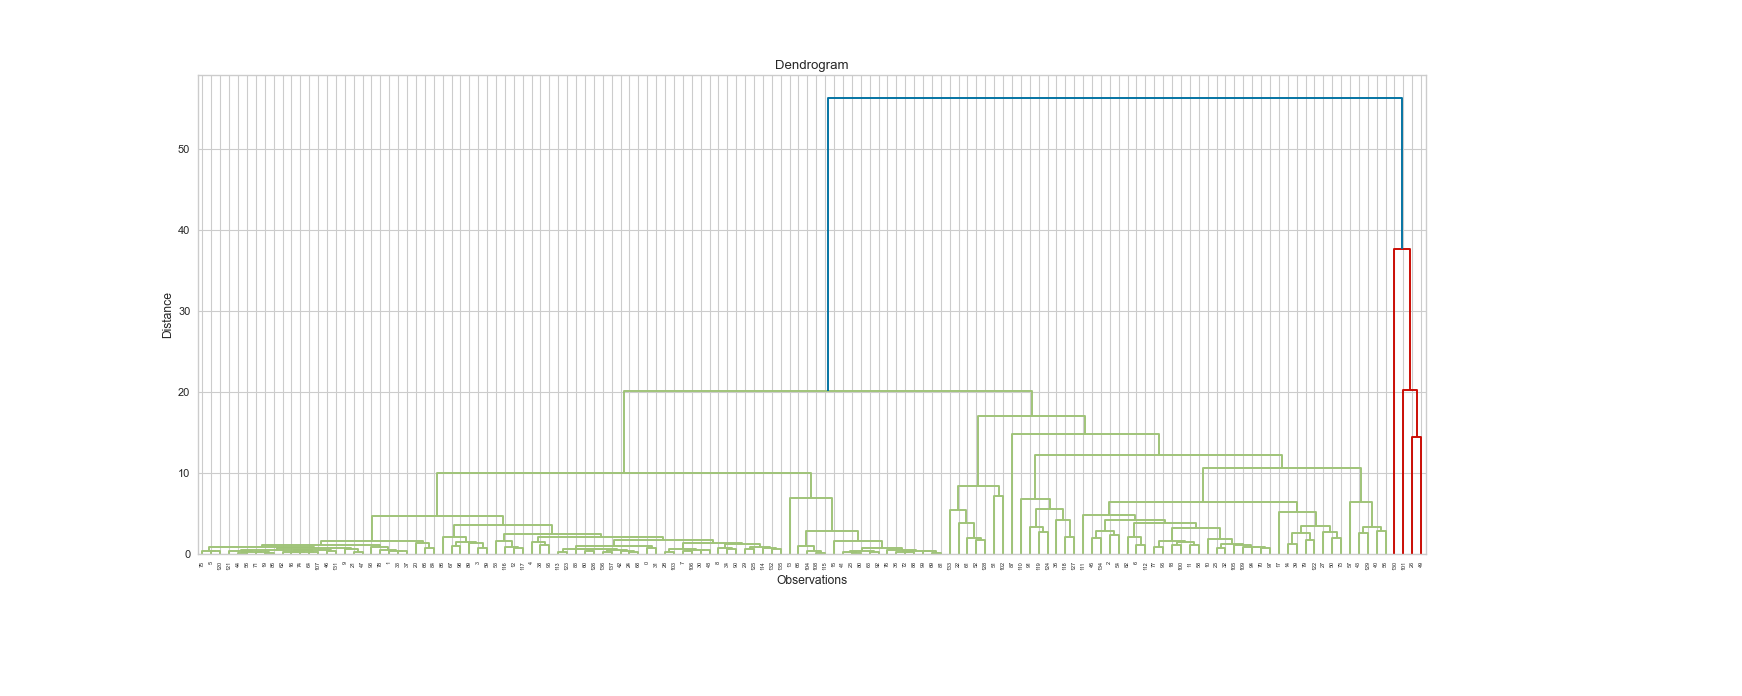

In [568]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(X_scaled, method = "ward"), leaf_font_size = 5);

<IPython.core.display.Javascript object>


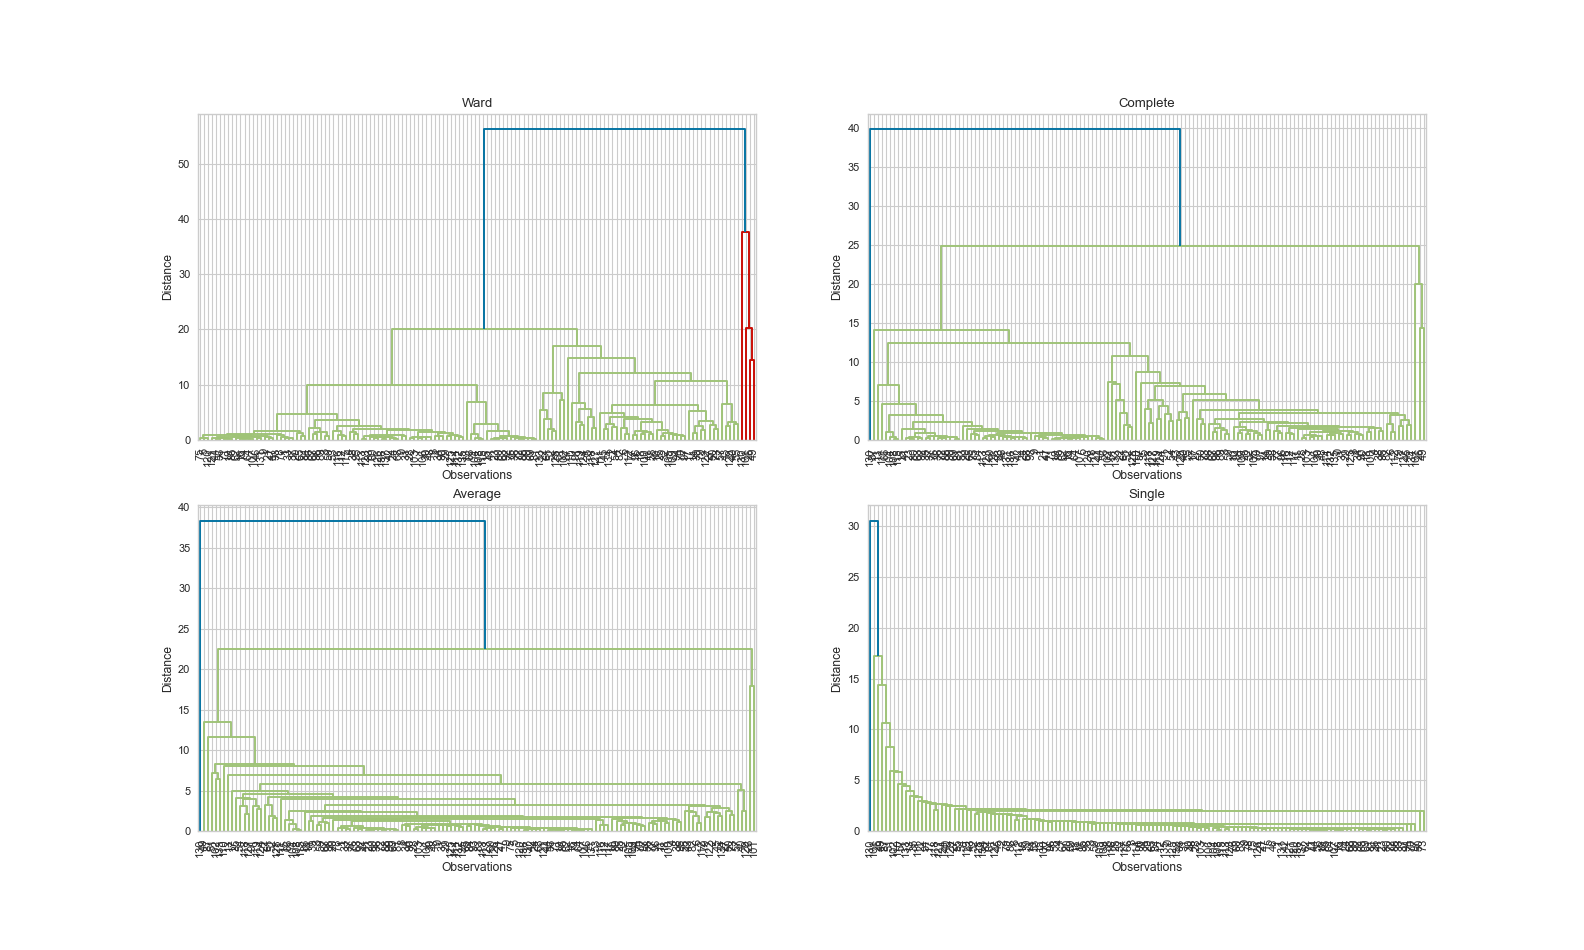

In [569]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                           affinity='euclidean', 
                                           linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')

Silhouette Score for 2 clusters: 0.8455107334057902
Silhouette Score for 3 clusters: 0.8178018574437472
Silhouette Score for 4 clusters: 0.8064895375260924
Silhouette Score for 5 clusters: 0.33624592581229146
Silhouette Score for 6 clusters: 0.3480186913192134
Silhouette Score for 7 clusters: 0.3463483299832806
Silhouette Score for 8 clusters: 0.3457615120949604
Silhouette Score for 9 clusters: 0.33252310675793867


### Model Building and label visualisation

In [125]:
model_labels = AgglomerativeClustering(n_clusters = 5,
                                       affinity='euclidean',
                                       linkage='ward').fit_predict(X_scaled)
model_labels

array([4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4,
       0, 4, 4, 0, 1, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0,
       4, 0, 4, 4, 4, 1, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0,
       4, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 3, 0, 4, 4, 0, 4, 4, 4, 0,
       0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 2, 4,
       4, 0, 0, 4, 4, 4], dtype=int64)

<IPython.core.display.Javascript object>


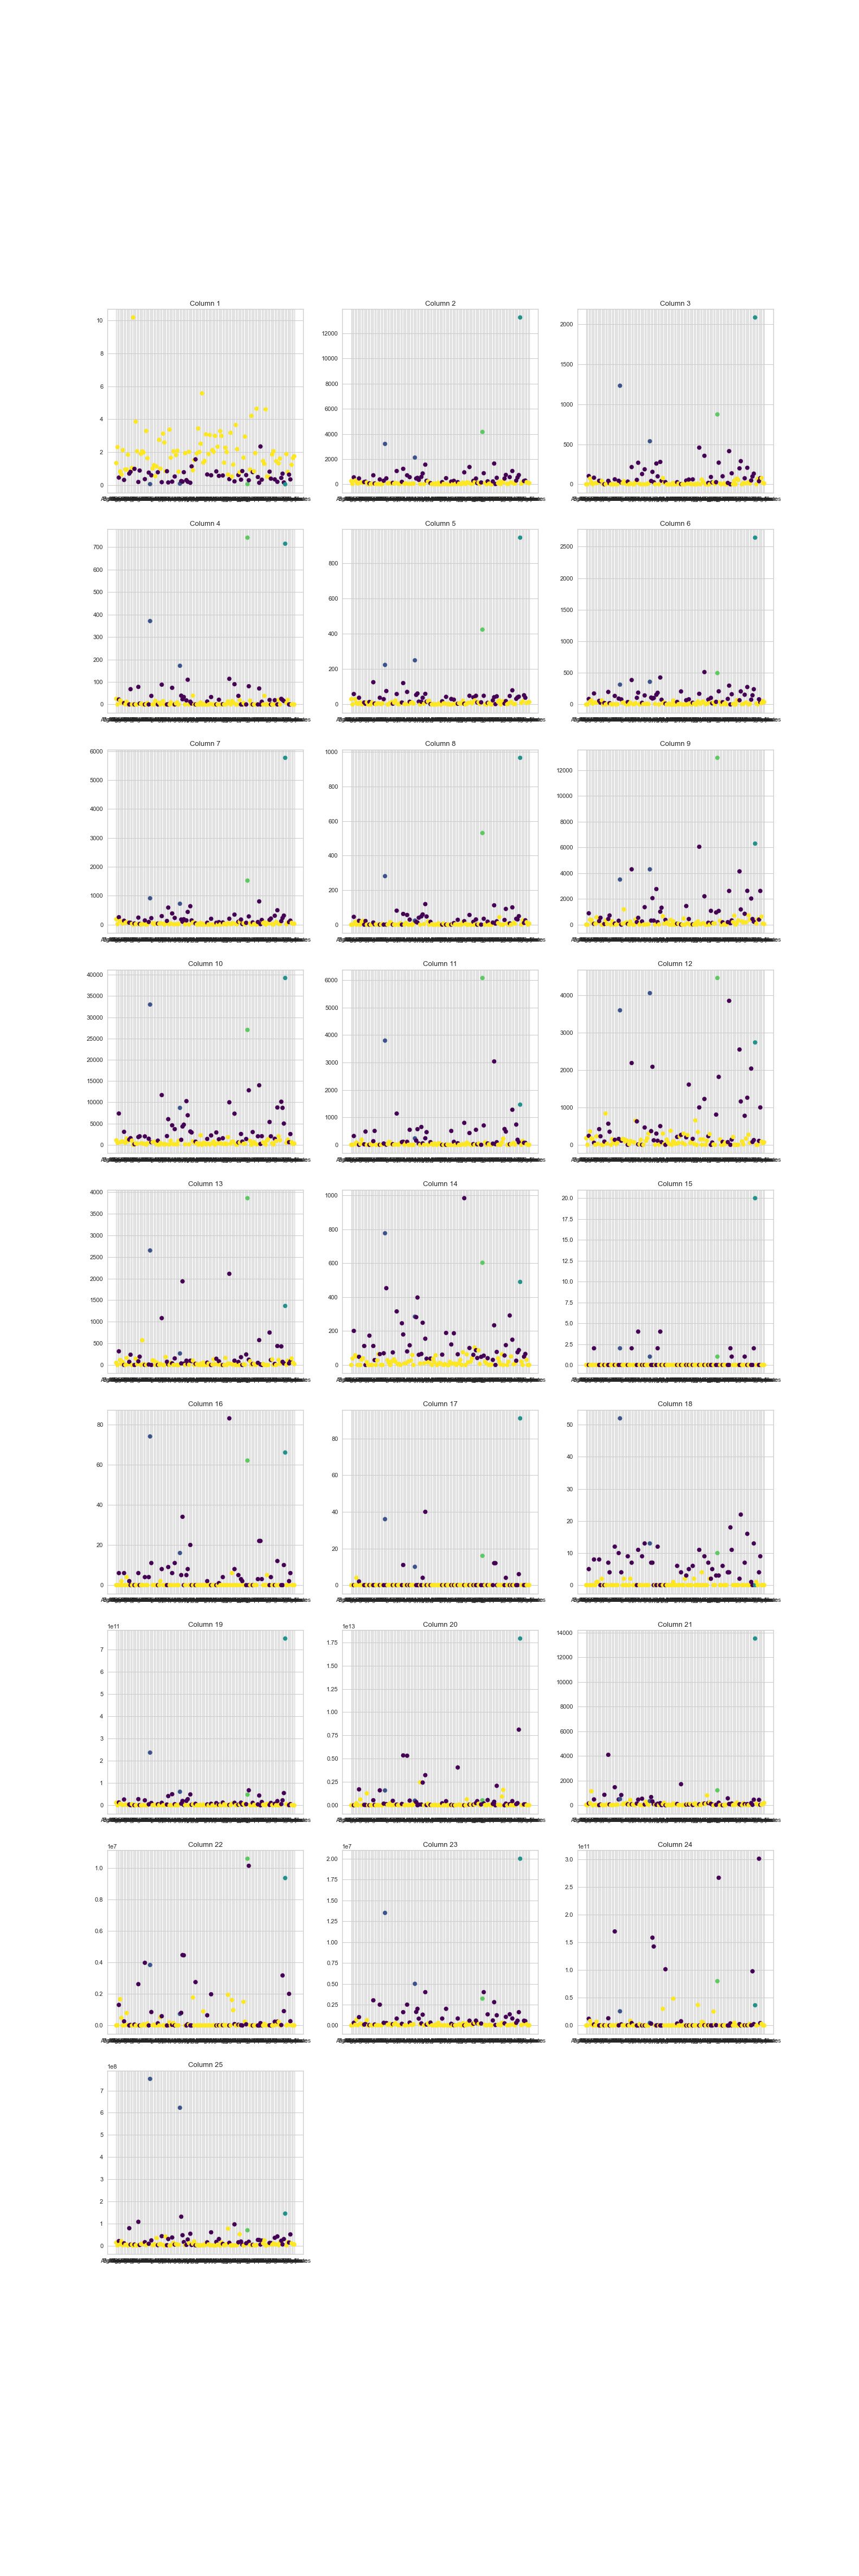

In [126]:
plt.figure(figsize = (20, 60))

for i in range(1, 26):
    plt.subplot(9, 3, i)
    plt.title(f"Column {i}")
    plt.scatter(df2.iloc[:, 0], df2.iloc[:, i], c = model_labels, cmap = "viridis");

In [127]:
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [128]:
df2["actual_clusters"] = ""
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [132]:
df2["predicted_clusters_hc"] = AgglomerativeClustering(n_clusters = 5,
                                                       affinity='euclidean',
                                                       linkage='ward').fit_predict(X_scaled)

In [133]:
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [134]:
df2["predicted_clusters_hc"].value_counts()

4    84
0    50
1     2
2     1
3     1
Name: predicted_clusters_hc, dtype: int64

In [135]:
index = 0
plt.figure(figsize=(25, 60))

for feature in df2:
    if feature != "predicted_clusters_hc":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x='predicted_clusters_hc', y=feature, data=df2)

<IPython.core.display.Javascript object>

ValueError: num must be 1 <= num <= 27, not 28

In [136]:
df2[df2["predicted_clusters_hc"]==0]["country"]

2                   Algeria
6                 Australia
10               Bangladesh
11                  Belarus
14                  Bolivia
17                   Brazil
18                 Bulgaria
22                   Canada
25                    Chile
27                 Colombia
32                  Denmark
35                    Egypt
39                  Finland
40                   France
43                  Germany
45                   Greece
50                Indonesia
51                     Iran
52                     Iraq
54                   Israel
55                    Italy
57                    Japan
58                   Jordan
61                   Kuwait
70                 Malaysia
73                   Mexico
77                  Morocco
79                  Myanmar
82              Netherlands
87              North Korea
91                 Pakistan
94                     Peru
96                   Poland
97                 Portugal
100                 Romania
102            Saudi

In [137]:
df2[df2["predicted_clusters_hc"]==1]["country"]

26    China
49    India
Name: country, dtype: object

In [139]:
df2[df2["predicted_clusters_hc"]==2]["country"]

130    United States
Name: country, dtype: object

In [140]:
df2[df2["predicted_clusters_hc"]==3]["country"]

101    Russia
Name: country, dtype: object

In [141]:
df2[df2["predicted_clusters_hc"]==4]["country"]

0                           Afghanistan
1                               Albania
3                                Angola
4                             Argentina
5                               Armenia
7                               Austria
8                            Azerbaijan
9                               Bahrain
12                              Belgium
13                               Bhutan
15               Bosnia and Herzegovina
16                             Botswana
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
23             Central African Republic
24                                 Chad
28                              Croatia
29                                 Cuba
30                              Czechia
31     Democratic Republic of the Congo
33                   Dominican Republic
34                              Ecuador
36                          El Salvador
37                              Estonia


In [142]:
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [143]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "less_powerfull",
                                                            1 : "powerfull",
                                                            2 : "most_powerfull",
                                                            3 : "more_powerfull",
                                                            4 : "weak"})
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [144]:
df2.groupby("predicted_clusters_hc")["country"].unique()

predicted_clusters_hc
0    [Algeria, Australia, Bangladesh, Belarus, Bolivia, Brazil, Bulgaria, Canada, Chile, Colombia, Denmark, Egypt, Finland, France, Germany, Greece, Indonesia, Iran, Iraq, Israel, Italy, Japan, Jordan,...
1                                                                                                                                                                                             [China, India]
2                                                                                                                                                                                            [United States]
3                                                                                                                                                                                                   [Russia]
4    [Afghanistan, Albania, Angola, Argentina, Armenia, Austria, Azerbaijan, Bahrain, Belgium, Bhutan, Bosnia and Herzegovina, Botswana, Burkina Faso, Cambodi

In [145]:
df2["military_power"].value_counts()

weak              84
less_powerfull    50
powerfull          2
most_powerfull     1
more_powerfull     1
Name: military_power, dtype: int64

In [146]:
df2.groupby("military_power")["country"].unique()["weak"]

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Belgium', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Croatia', 'Cuba',
       'Czechia', 'Democratic Republic of the Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Honduras',
       'Hungary', 'Ireland', 'Ivory Coast', 'Kazakhstan', 'Kenya',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'Mali', 'Mauritania', 'Moldova',
       'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Qatar',
       'Republic of the Congo', 'Serbia', 'Sierra Leone', 'Slovakia',
       'Slovenia', 'Somalia', 'Sri Lanka', 

In [147]:
df2.groupby("military_power")["country"].unique()["less_powerfull"]

array(['Algeria', 'Australia', 'Bangladesh', 'Belarus', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Indonesia',
       'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait',
       'Malaysia', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands',
       'North Korea', 'Pakistan', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'South Sudan', 'Spain', 'Syria', 'Taiwan', 'Thailand', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Venezuela',
       'Vietnam'], dtype=object)

In [148]:
df2.groupby("military_power")["country"].unique()["powerfull"]

array(['China', 'India'], dtype=object)

In [149]:
df2.groupby("military_power")["country"].unique()["more_powerfull"]

array(['Russia'], dtype=object)

In [153]:
df2.groupby("military_power")["country"].unique()["most_powerfull"]

array(['United States'], dtype=object)

### Evaluate 

In [154]:
df2.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [155]:
df2.sort_values(by="military_strength_power_index", inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.head(3)

country  military_strength_power_index  aircraft_strength_value  \
0  United States                          0.061                    13264   
1         Russia                          0.068                     4163   
2          China                          0.069                     3210   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                2085                             715   
1                                 873                             742   
2                                1232                             371   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                      945                          2643   
1                                      424                           497   
2                                      224                           314   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             5768                                     967   
1                             1522                                     531   
2                              911                                     281   

   tank_strength_value  afv/apc_strength_value  \
0                 6289                   39253   
1                12950                   27038   
2                 3500                   33000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                     1465                            2740   
1                                     6083                            4465   
2                                     3800                            3600   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                             1366                     490.000   
1                             3860                     603.000   
2                             2650                     777.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 20.000                          66.000   
1                                  1.000                          62.000   
2                                  2.000                          74.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          91.000                         0.000   
1                          16.000                        10.000   
2                          36.000                        52.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0               750000000000.000   17910000000000.000                 13513   
1                48000000000.000     539600000000.000                  1218   
2               237000000000.000    1598000000000.000                   507   

   oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
0           9352000.000           20000000.000            36520000000.000   
1          10580000.000            3225000.000            80000000000.000   
2           3838000.000           13500000.000            25620000000.000   

   available_manpower_value  total_population_value actual_clusters  \
0             144872845.000           329256465.000                   
1              69640160.000           142122776.000                   
2             752855402.000          1384688986.000                   

   predicted_clusters_hc  military_power  
0                      2  most_powerfull  
1                      3  more_powerfull  
2                      1       powerfull

In [156]:
df2.loc[54:138, "actual_clusters"] = 4
df2.loc[4:53, "actual_clusters"] = 0
df2.loc[2:3, "actual_clusters"] = 1
df2.loc[1:1, "actual_clusters"] = 3
df2.loc[0:0, "actual_clusters"] = 2
df2.head(5)

country  military_strength_power_index  aircraft_strength_value  \
0  United States                          0.061                    13264   
1         Russia                          0.068                     4163   
2          China                          0.069                     3210   
3          India                          0.095                     2123   
4          Japan                          0.150                     1561   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                2085                             715   
1                                 873                             742   
2                                1232                             371   
3                                 538                             172   
4                                 279                              12   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                      945                          2643   
1                                      424                           497   
2                                      224                           314   
3                                      250                           359   
4                                       60                           427   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             5768                                     967   
1                             1522                                     531   
2                              911                                     281   
3                              722                                      23   
4                              637                                     119   

   tank_strength_value  afv/apc_strength_value  \
0                 6289                   39253   
1                12950                   27038   
2                 3500                   33000   
3                 4292                    8686   
4                 1004                    3130   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                     1465                            2740   
1                                     6083                            4465   
2                                     3800                            3600   
3                                      235                            4060   
4                                      238                             500   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                             1366                     490.000   
1                             3860                     603.000   
2                             2650                     777.000   
3                              266                     285.000   
4                               99                     155.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 20.000                          66.000   
1                                  1.000                          62.000   
2                                  2.000                          74.000   
3                                  1.000                          16.000   
4                                  4.000                          20.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          91.000                         0.000   
1                          16.000                        10.000   
2                          36.000                        52.000   
3                          10.000                        13.000   
4                          40.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0               750000000000.000   17910000000000.000                 13513   
1 

In [157]:
(df2["actual_clusters"]==df2["predicted_clusters_hc"]).value_counts()

True     120
False     18
dtype: int64

In [158]:
accuracy_score = round((df2["actual_clusters"]==df2["predicted_clusters_hc"]).sum()*100/len(df2), 2)
print(f"accuracy_score: {accuracy_score}%")

accuracy_score: 86.96%


In [159]:
pd.crosstab(index=df2["actual_clusters"], columns=df2["predicted_clusters_hc"])

predicted_clusters_hc   0  1  2  3   4
actual_clusters                       
0                      41  0  0  0   9
1                       0  2  0  0   0
2                       0  0  1  0   0
3                       0  0  0  1   0
4                       9  0  0  0  75

In [165]:
df2["predicted_clusters_hc"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10))

<AxesSubplot:xlabel='predicted_clusters_hc', ylabel='predicted_clusters_hc'>

In [166]:
sns.countplot(x=df2["predicted_clusters_hc"], data=df2)

<AxesSubplot:xlabel='predicted_clusters_hc', ylabel='count'>

<IPython.core.display.Javascript object>


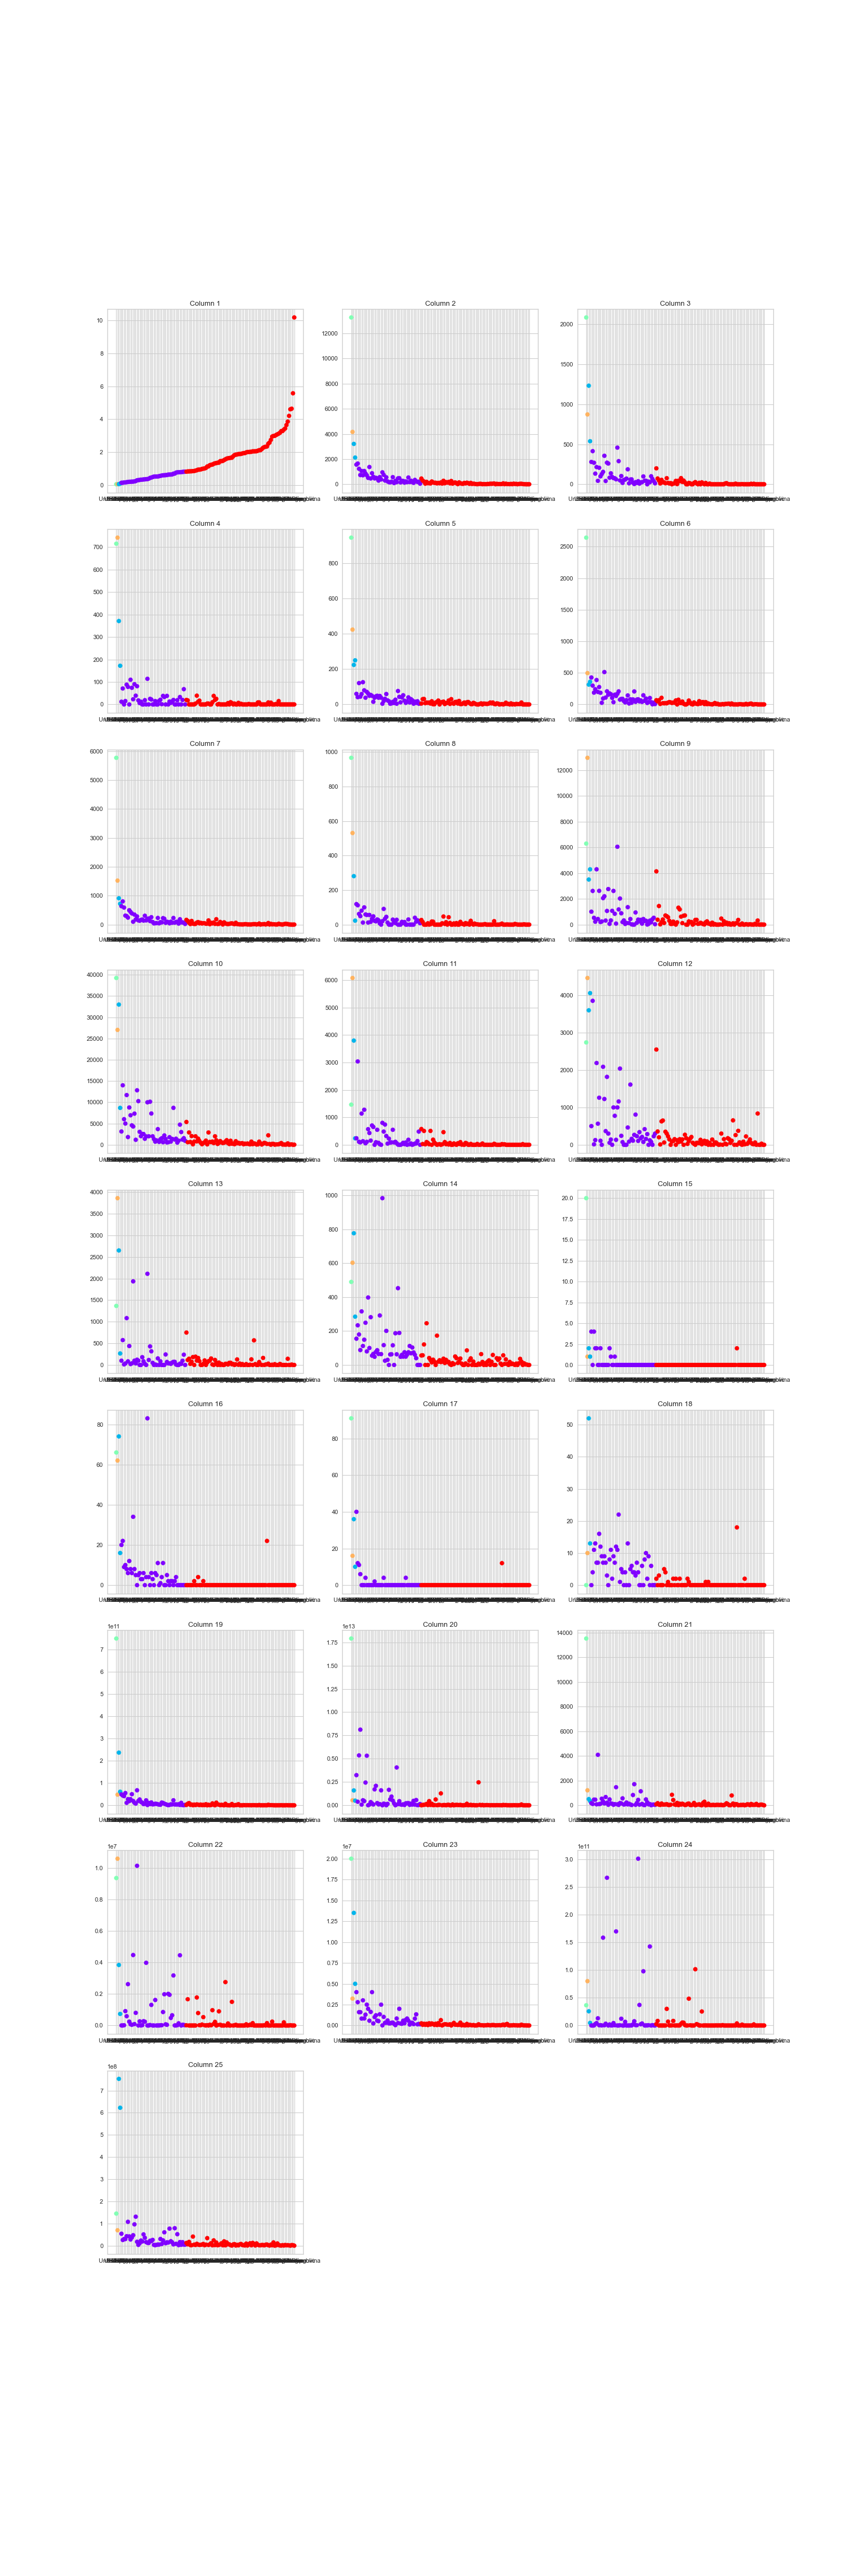

In [163]:
plt.figure(figsize = (20, 60))

for i in range(1, 26):
    plt.subplot(9, 3, i)
    plt.title(f"Column {i}")
    plt.scatter(df2.iloc[:,0], df2.iloc[:,i], c = df2["actual_clusters"], s = 50, cmap = "rainbow")